# DSC540 Project 2

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

## Rules
- Do not change the code already present in the notebook.
- Write your code under the corresponding questions where you see `# Code here`. You are encouraged to use more than one cell.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Clicking on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- For built-in function and methods you use from libraries, provide a very brief explanation of what they do.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name before beginning to code.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML   
    
> **Do not ZIP the files.**

Good Luck!

### Sidhant Thakur


**Honor Pledge:**  
I pledge on my honor that I, **Sidhant Thakur**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 



## Project Description

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com).  
Lending Club connects people who need money (borrowers) with people who have money (investors).   
Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Check out more info on Lending Club on [Wikipedia](https://en.wikipedia.org/wiki/Lending_Club). Lending Club also had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016).

This dataset is from before they went public.

We will use lending data from 2007-2010 and will try to classify and predict whether or not the borrower paid back their loan in full. You will analyze the data file provided. 

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* not.fully.paid: Whether the loan was paid back or not.

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [479]:
import warnings
warnings.filterwarnings("ignore")

In [480]:
%config InlineBackend.figure_format ='retina'
RANDOM_STATE = 42

In [481]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [482]:
import sklearn
sklearn.__version__

'1.0.2'

In [483]:
pd.set_option('display.max_columns', 100)

### These are the packages I used

In [484]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Q1
- Read in the dataset `loan_data.csv`
- How many rows and variables are there?
- What are the unique values of `not.fully.paid`?
- `not.fully.paid` having a value of 1 means that the person who took the loan did not fully pay it back. What's the proportion of those people in the full dataset?

## Get the Data

**Use pandas to read in the datasets as a dataframe.**

In [485]:
loans = pd.read_csv('loans.csv')

In [486]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1183,231.94,10.348846,5.69,712,2460.958333,6955,63.8,1,0,0,0
1,1,major_purchase,0.0774,124.88,11.264464,7.17,792,6360.041667,168,0.7,0,0,0,0
2,1,credit_card,0.1505,86.73,11.184421,16.30,667,3600.000000,16242,95.5,0,0,0,0
3,1,debt_consolidation,0.1284,403.42,10.736397,19.57,697,3450.041667,27261,87.4,1,0,0,0
4,1,debt_consolidation,0.1531,278.53,10.621327,8.20,662,1860.000000,7979,48.7,0,1,0,0


In [487]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      2981 non-null   int64  
 1   purpose            2981 non-null   object 
 2   int.rate           2981 non-null   float64
 3   installment        2981 non-null   float64
 4   log.annual.inc     2981 non-null   float64
 5   dti                2981 non-null   float64
 6   fico               2981 non-null   int64  
 7   days.with.cr.line  2981 non-null   float64
 8   revol.bal          2981 non-null   int64  
 9   revol.util         2981 non-null   float64
 10  inq.last.6mths     2981 non-null   int64  
 11  delinq.2yrs        2981 non-null   int64  
 12  pub.rec            2981 non-null   int64  
 13  not.fully.paid     2981 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 326.2+ KB


Their are 14 variables and 2981 rows

In [488]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2.981000e+03,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000
mean,0.748071,0.125977,326.020778,10.898762,12.794119,705.839316,4460.703008,1.826035e+04,48.442170,1.868165,0.171419,0.073465,0.480711
std,0.434193,0.026565,213.108504,0.650773,6.986455,37.073906,2486.531742,4.029009e+04,29.251287,2.567033,0.526928,0.271035,0.499712
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,180.041667,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.109600,165.630000,10.498250,7.170000,677.000000,2760.041667,2.979000e+03,24.700000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.125300,275.570000,10.915088,12.870000,702.000000,4043.000000,8.493000e+03,48.800000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.142600,457.050000,11.289782,18.350000,732.000000,5640.041667,1.853800e+04,72.500000,3.000000,0.000000,0.000000,1.000000
max,1.000000,0.216400,926.830000,14.124465,29.960000,817.000000,17616.000000,1.207359e+06,119.000000,33.000000,6.000000,3.000000,1.000000


In [489]:
loans["not.fully.paid"].nunique()

2

In [490]:
loans['not.fully.paid'].value_counts(normalize=True)*100

0    51.928883
1    48.071117
Name: not.fully.paid, dtype: float64

Around 52% of is of category 0 i.e. the person who took the loan and  fully pay it back
Around 48% of is of category 1 i.e.  the person who took the loan did not fully pay it back

# Q2
- Visual and Exploratory Analysis
- Carry out the tasks given below

## Exploratory Data Analysis

- Let's do some data visualization! 
- You can use many different visualization libraries inclusing matplotlib, seaborn, pandasand many more. Feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

**Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

Text(0.5, 0, 'FICO')

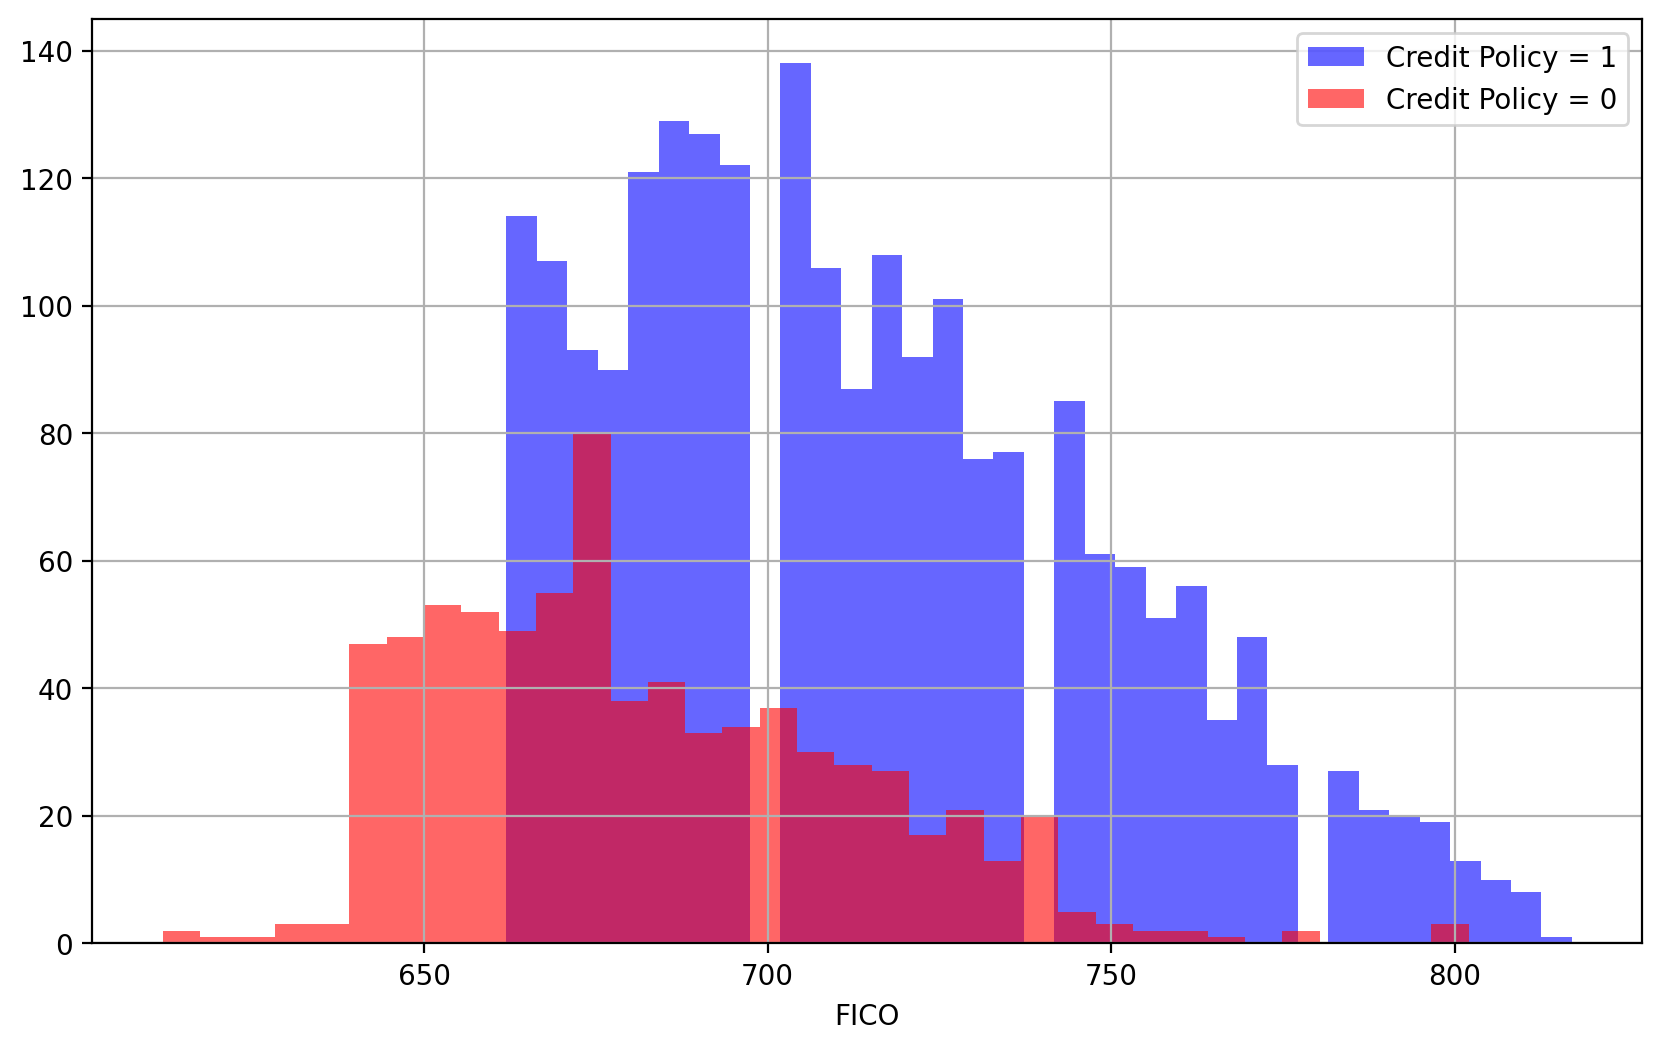

In [491]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(bins=35,color='blue', alpha=0.6,label='Credit Policy = 1')
loans[loans['credit.policy']==0]['fico'].hist(bins=35,color='red', alpha=0.6,label='Credit Policy = 0')
plt.legend()
plt.xlabel("FICO")

Text(0.5, 0, 'FICO')

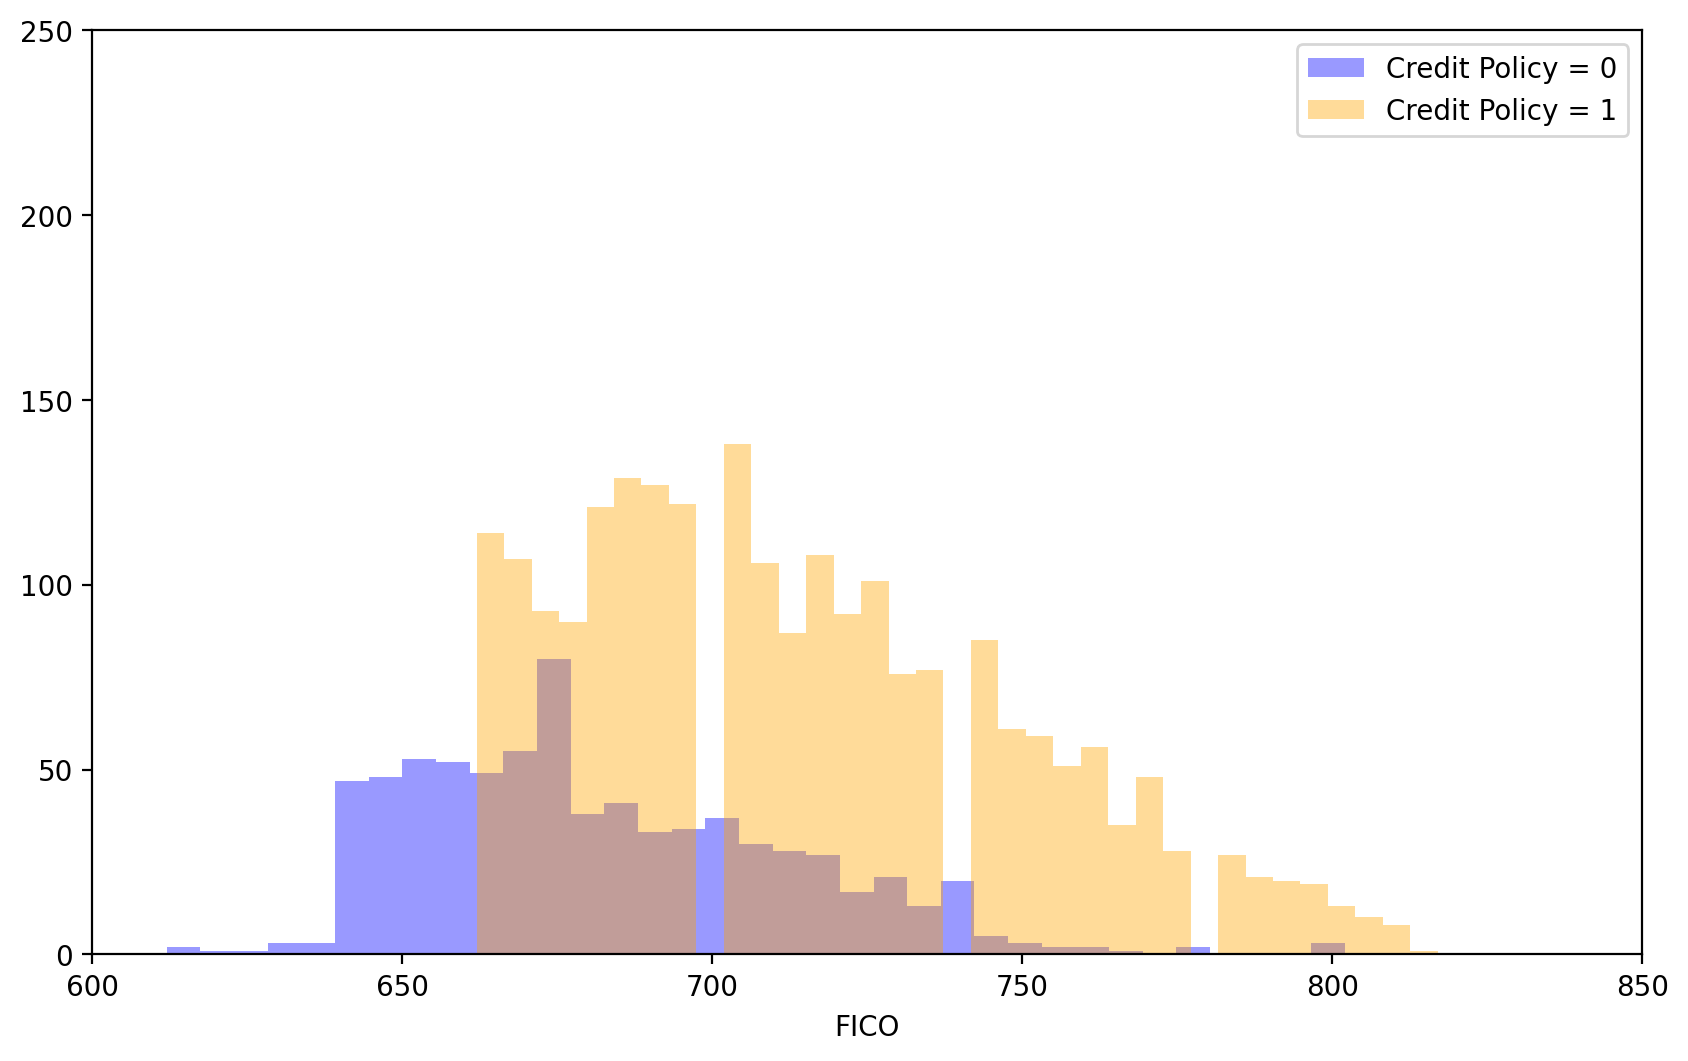

In [492]:
# Alternatively you can use seaborn library to create the same histogram (although due to bin creation, it might look different!)
import seaborn as sns
plt.figure(figsize=(10,6))
sns.distplot(loans[loans['credit.policy'] == 0]['fico'], bins = 35, kde = False, color = 'blue', label = 'Credit Policy = 0')
sns.distplot(loans[loans['credit.policy'] == 1]['fico'], bins = 35, kde = False, color = 'orange', label = 'Credit Policy = 1')
plt.xlim(600,850)
plt.ylim(0,250)
plt.legend(loc = 1)
plt.xlabel('FICO')

**Create another histogram for `not.fully.paid` column.**

Text(0.5, 0, 'FICO')

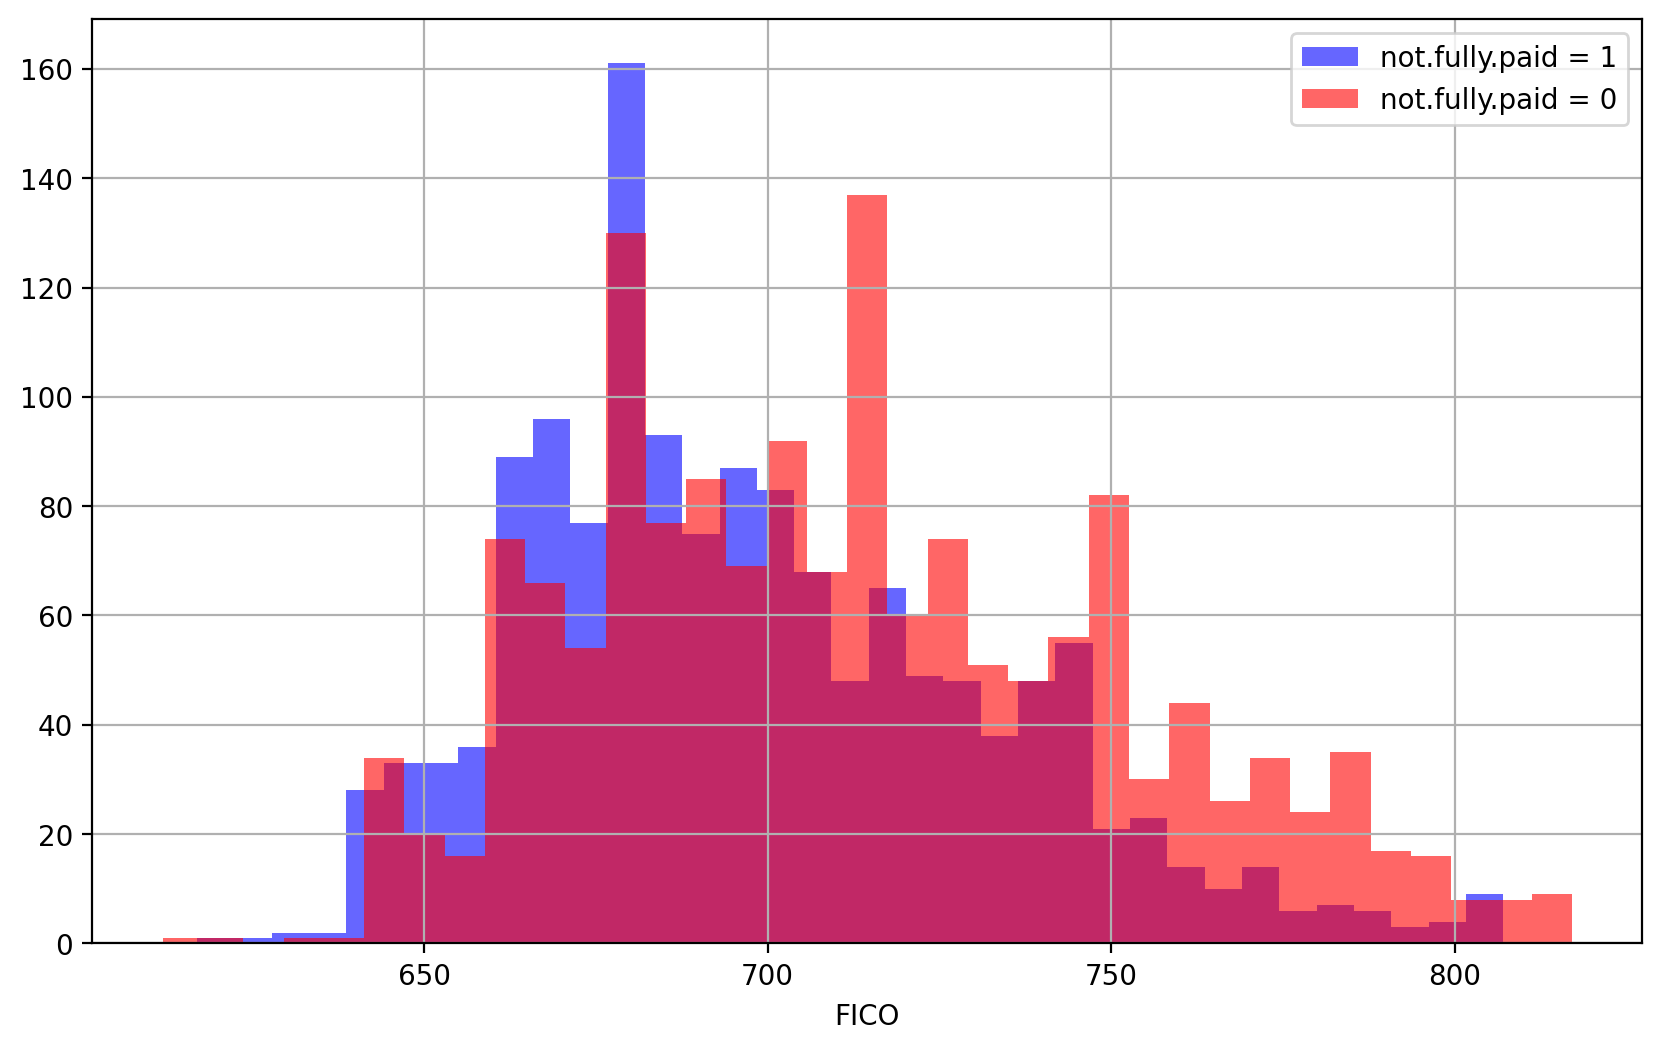

In [493]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(bins=35,color='blue', alpha=0.6,label='not.fully.paid = 1')
loans[loans['not.fully.paid']==0]['fico'].hist(bins=35,color='red', alpha=0.6,label='not.fully.paid = 0')
plt.legend()
plt.xlabel("FICO")

**Create a countplot (bar plot showing counts using seaborn) that shows the counts of loans by purpose, with the color hue defined by `not.fully.paid`**

<AxesSubplot:xlabel='count', ylabel='purpose'>

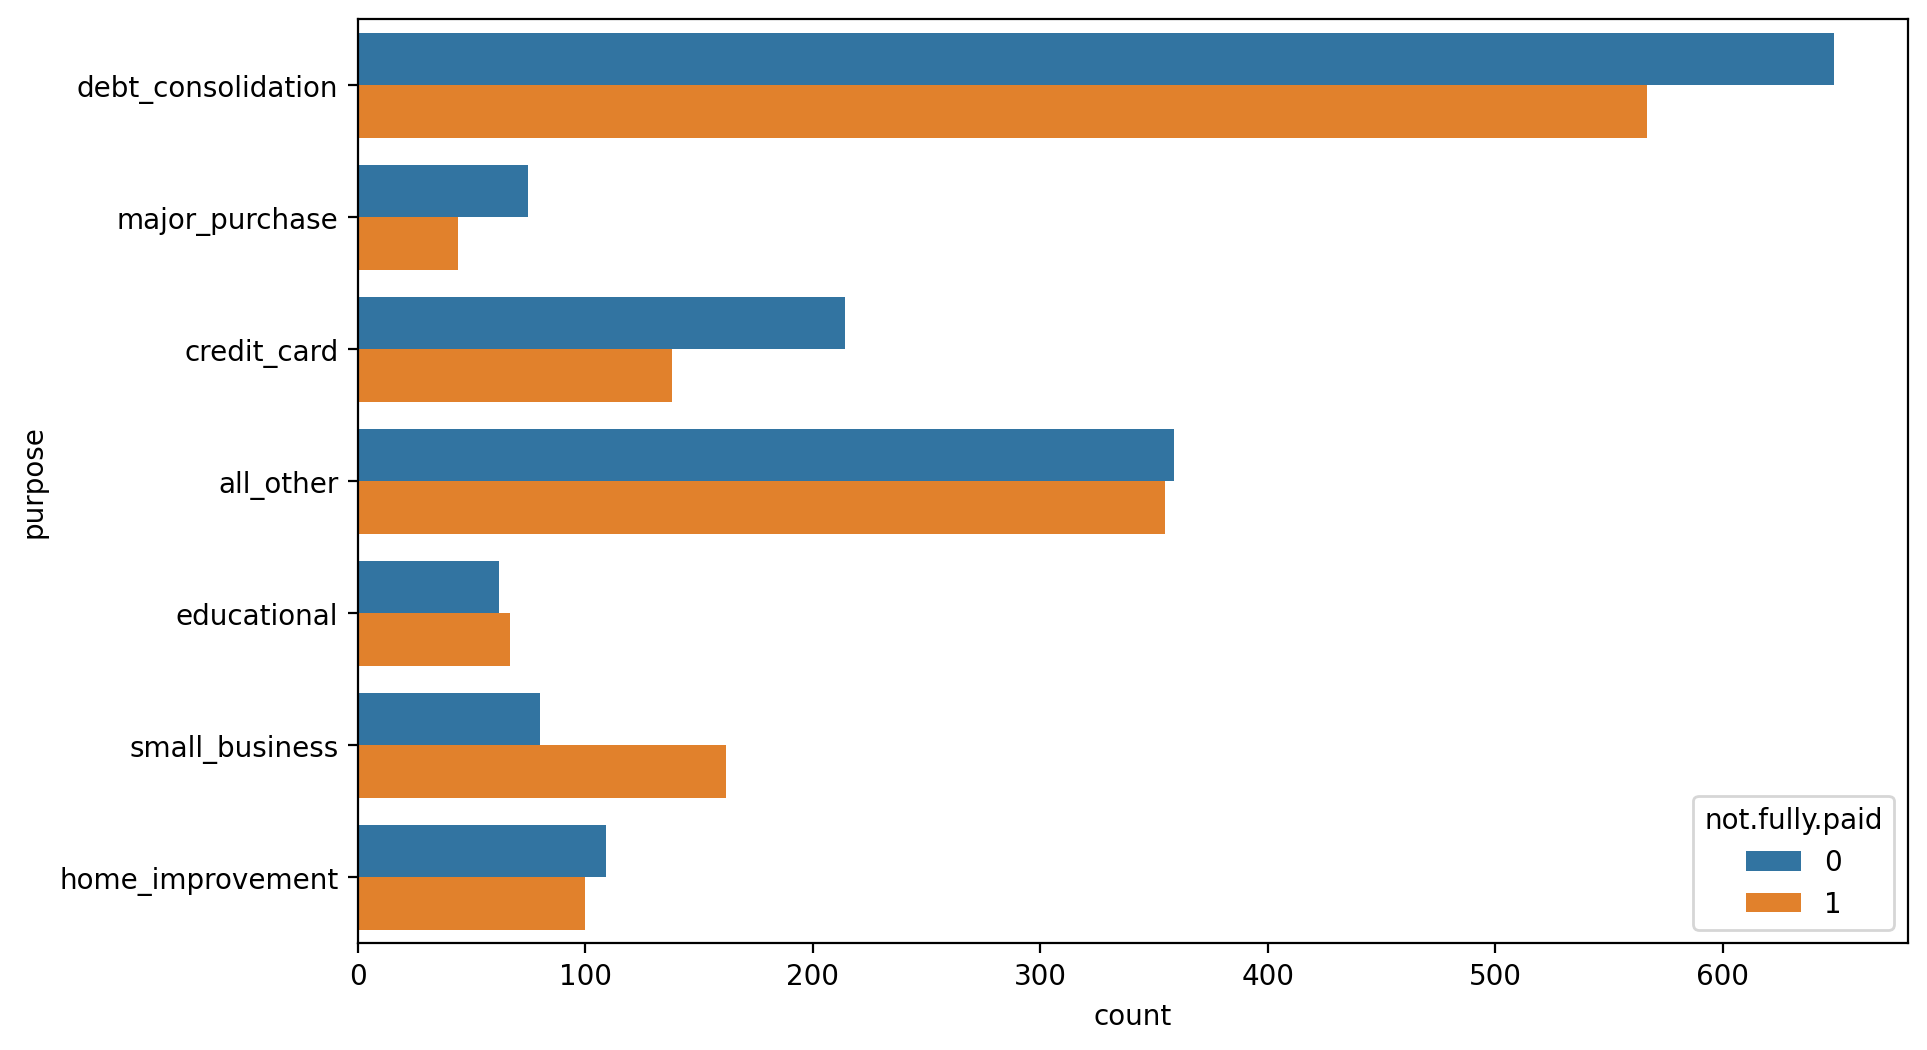

In [494]:
plt.subplots(figsize = (10,6))
sns.countplot(y = 'purpose', hue = 'not.fully.paid', data = loans)

**Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

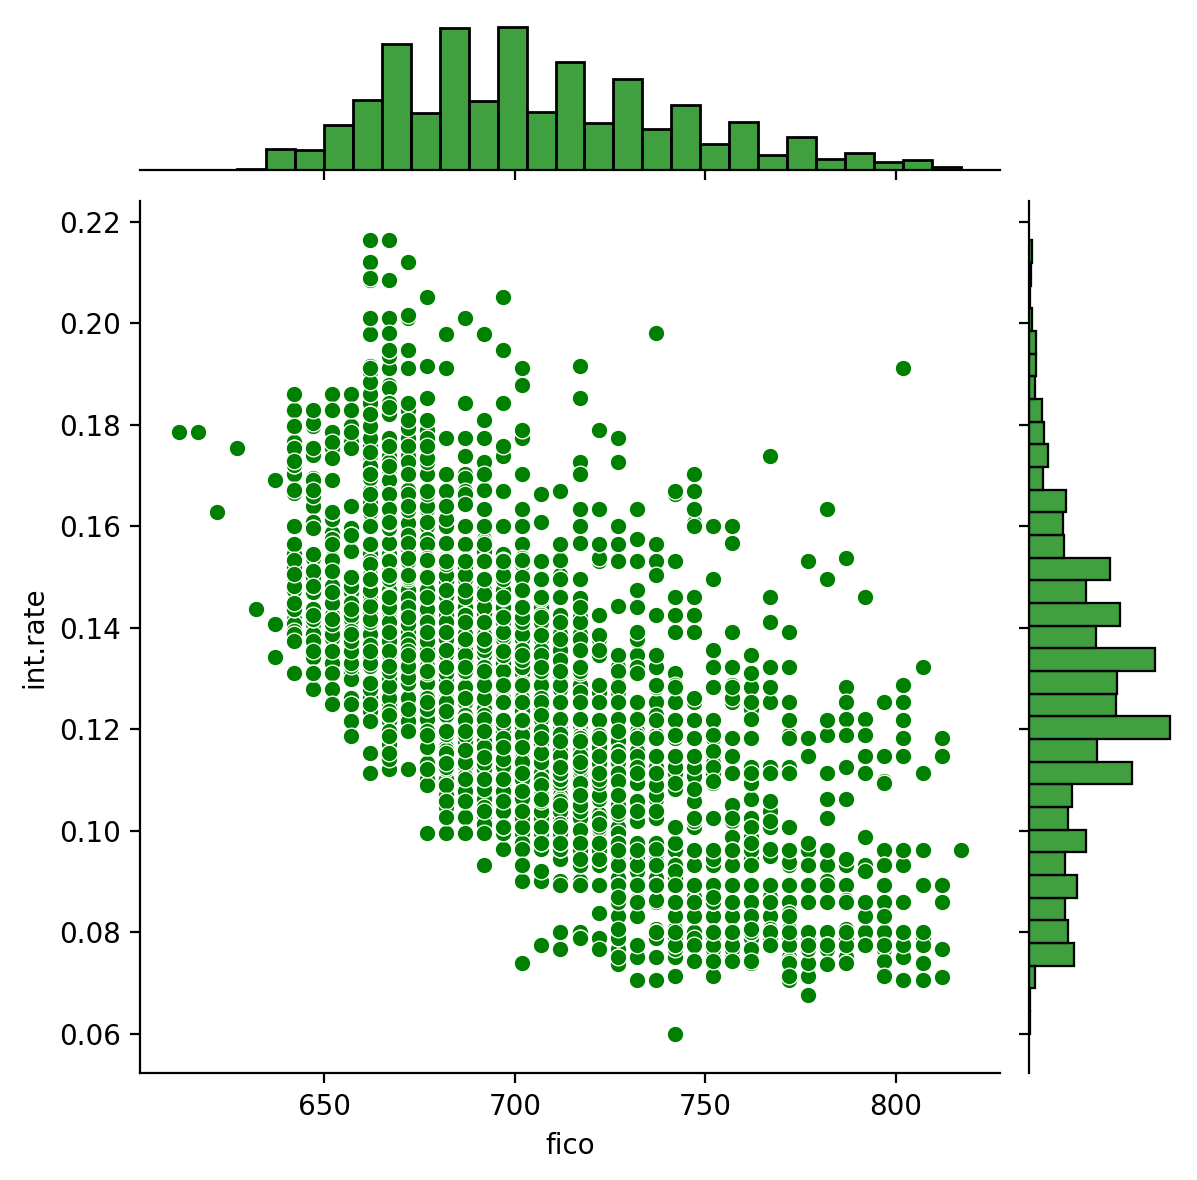

In [495]:
sns.jointplot(x = 'fico', y = 'int.rate', data = loans, color="g")

**Create the following lmplots to see if the trend differed between `not.fully.paid` and `int.rate`. Check the documentation for seaborn `lmplot()` if you can't figure out how to separate it into columns.**

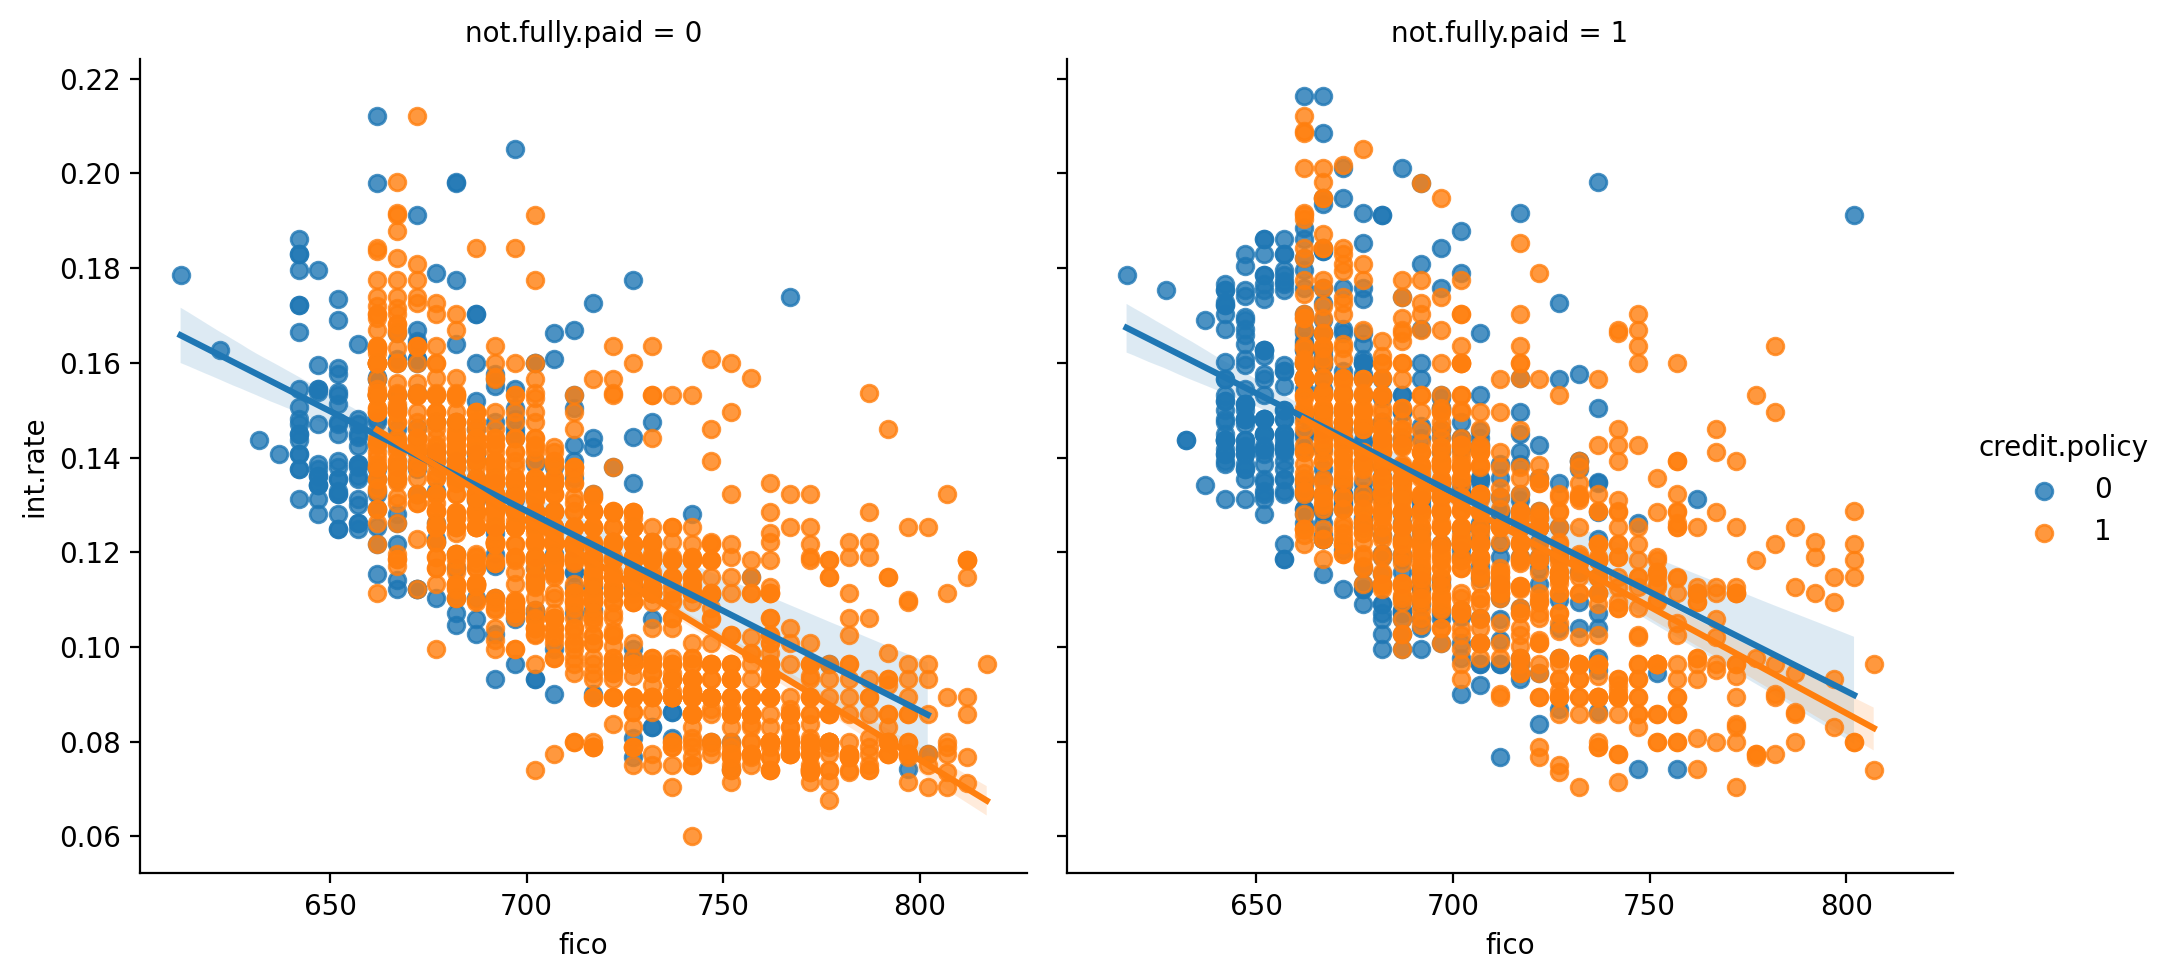

In [496]:
sns.lmplot(x = 'fico', y = 'int.rate', col = 'not.fully.paid', hue = 'credit.policy', data = loans)

# Q3

## Setting up the Data

Let's get ready to set up our data for our models!

**This question has already been solved. You don't need to do anything. Just run the cells and continue.**

In [497]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      2981 non-null   int64  
 1   purpose            2981 non-null   object 
 2   int.rate           2981 non-null   float64
 3   installment        2981 non-null   float64
 4   log.annual.inc     2981 non-null   float64
 5   dti                2981 non-null   float64
 6   fico               2981 non-null   int64  
 7   days.with.cr.line  2981 non-null   float64
 8   revol.bal          2981 non-null   int64  
 9   revol.util         2981 non-null   float64
 10  inq.last.6mths     2981 non-null   int64  
 11  delinq.2yrs        2981 non-null   int64  
 12  pub.rec            2981 non-null   int64  
 13  not.fully.paid     2981 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 326.2+ KB


## Categorical Features

Notice that the **purpose** column is of categorical type.

That means we need to transform them using dummy variables so sklearn will be able to understand them.   

Let's do this in one step using pd.get_dummies().


> The same transformation needs to be aplied on the test set as well. The easiest way would be to merge train and test sets, and to split after the transformation.

In [498]:
cat_feats = ['purpose']

In [499]:
loans = pd.get_dummies(loans, columns=cat_feats, drop_first=False)

In [500]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               2981 non-null   int64  
 1   int.rate                    2981 non-null   float64
 2   installment                 2981 non-null   float64
 3   log.annual.inc              2981 non-null   float64
 4   dti                         2981 non-null   float64
 5   fico                        2981 non-null   int64  
 6   days.with.cr.line           2981 non-null   float64
 7   revol.bal                   2981 non-null   int64  
 8   revol.util                  2981 non-null   float64
 9   inq.last.6mths              2981 non-null   int64  
 10  delinq.2yrs                 2981 non-null   int64  
 11  pub.rec                     2981 non-null   int64  
 12  not.fully.paid              2981 non-null   int64  
 13  purpose_all_other           2981 

In [501]:
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1183,231.94,10.348846,5.69,712,2460.958333,6955,63.8,1,0,0,0,0,0,1,0,0,0,0
1,1,0.0774,124.88,11.264464,7.17,792,6360.041667,168,0.7,0,0,0,0,0,0,0,0,0,1,0
2,1,0.1505,86.73,11.184421,16.30,667,3600.000000,16242,95.5,0,0,0,0,0,1,0,0,0,0,0
3,1,0.1284,403.42,10.736397,19.57,697,3450.041667,27261,87.4,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1531,278.53,10.621327,8.20,662,1860.000000,7979,48.7,0,1,0,0,0,0,1,0,0,0,0


## Train Test Split

Now its time to split our data into a training set and a validation set!  

The `not.fully.paid` variable is the one that we will try to predict.

**Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [502]:
from sklearn.model_selection import train_test_split

In [503]:
loans

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1183,231.94,10.348846,5.69,712,2460.958333,6955,63.8,1,0,0,0,0,0,1,0,0,0,0
1,1,0.0774,124.88,11.264464,7.17,792,6360.041667,168,0.7,0,0,0,0,0,0,0,0,0,1,0
2,1,0.1505,86.73,11.184421,16.30,667,3600.000000,16242,95.5,0,0,0,0,0,1,0,0,0,0,0
3,1,0.1284,403.42,10.736397,19.57,697,3450.041667,27261,87.4,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1531,278.53,10.621327,8.20,662,1860.000000,7979,48.7,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976,0,0.1797,364.99,10.762488,23.53,642,4252.041667,10226,63.9,1,1,0,0,0,0,1,0,0,0,0
2977,1,0.1316,202.63,11.156251,23.91,692,2130.000000,22713,43.1,1,0,0,0,0,0,1,0,0,0,0
2978,1,0.1148,263.75,10.491274,2.90,727,1800.000000,2980,31.7,1,0,0,0,0,0,1,0,0,0,0
2979,1,0.1442,859.57,12.611538,1.48,702,5279.958333,28367,66.5,2,1,0,0,0,0,0,0,1,0,0


In [504]:
X = loans.drop('not.fully.paid',axis=1)
y = loans['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=RANDOM_STATE)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=RANDOM_STATE)

<AxesSubplot:>

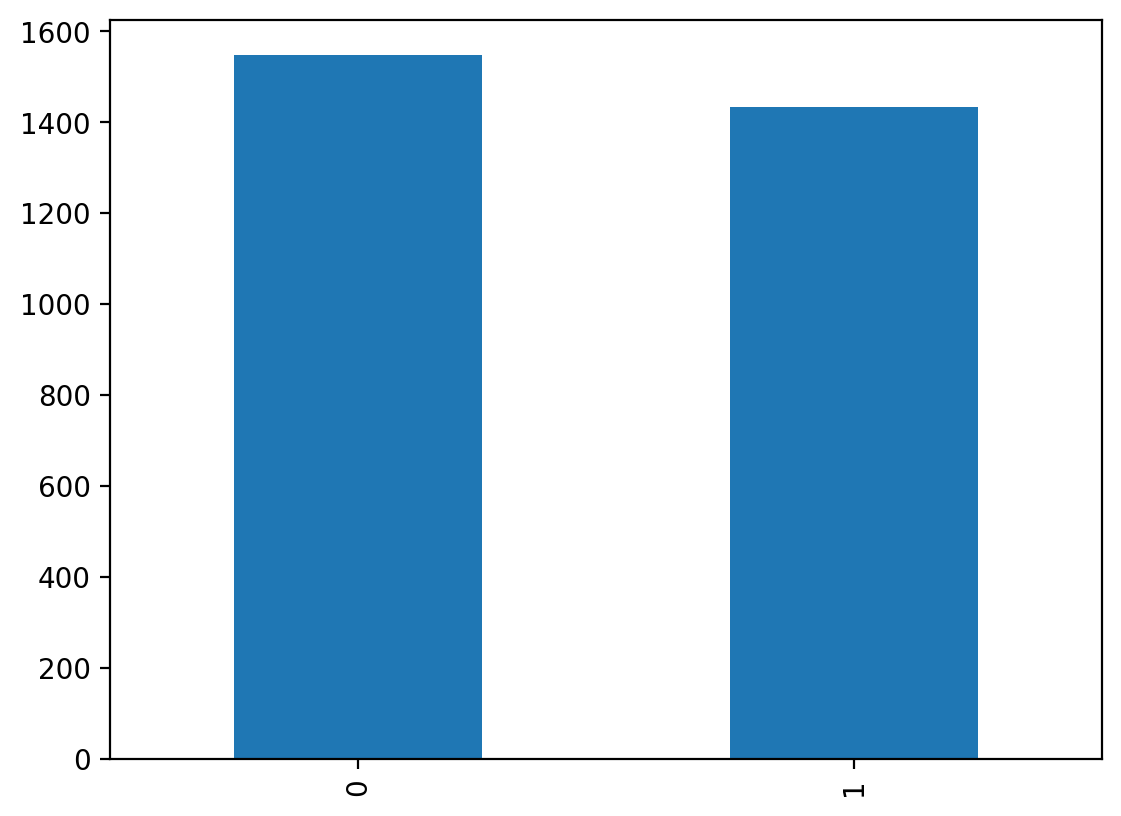

In [505]:
y.value_counts().plot(kind='bar')

<AxesSubplot:>

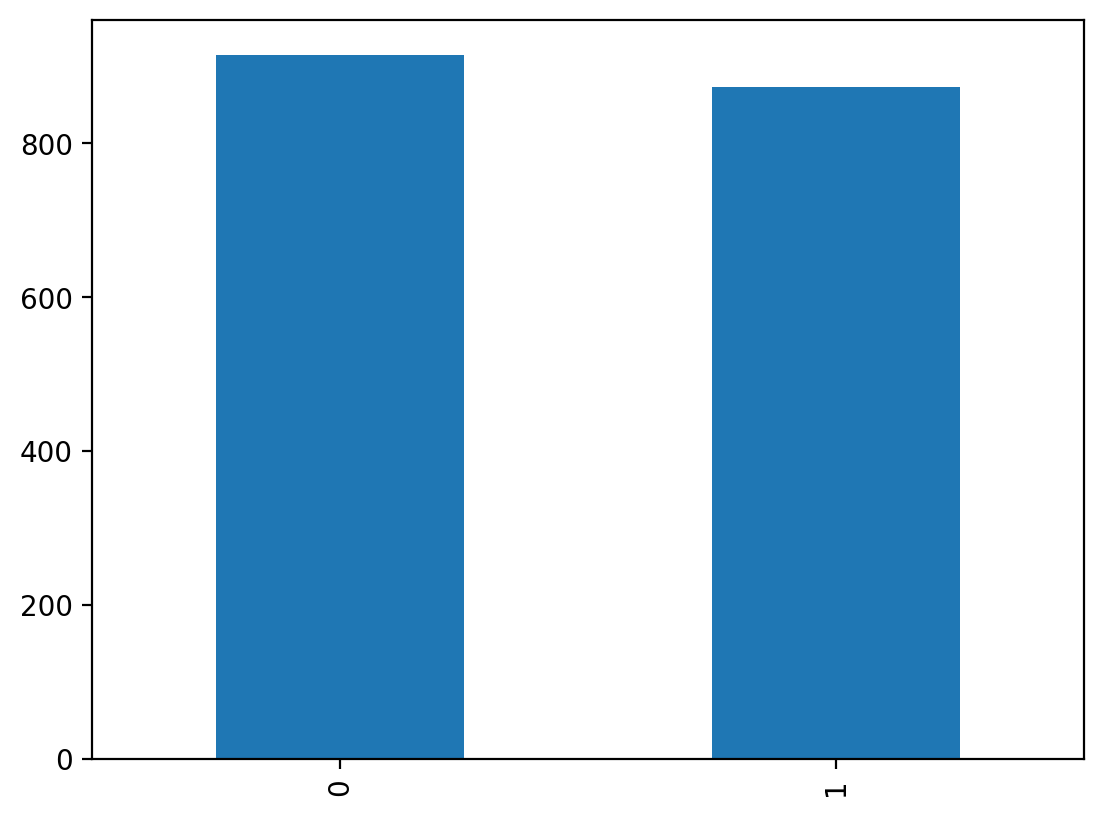

In [506]:
y_train.value_counts().plot(kind='bar')

<AxesSubplot:>

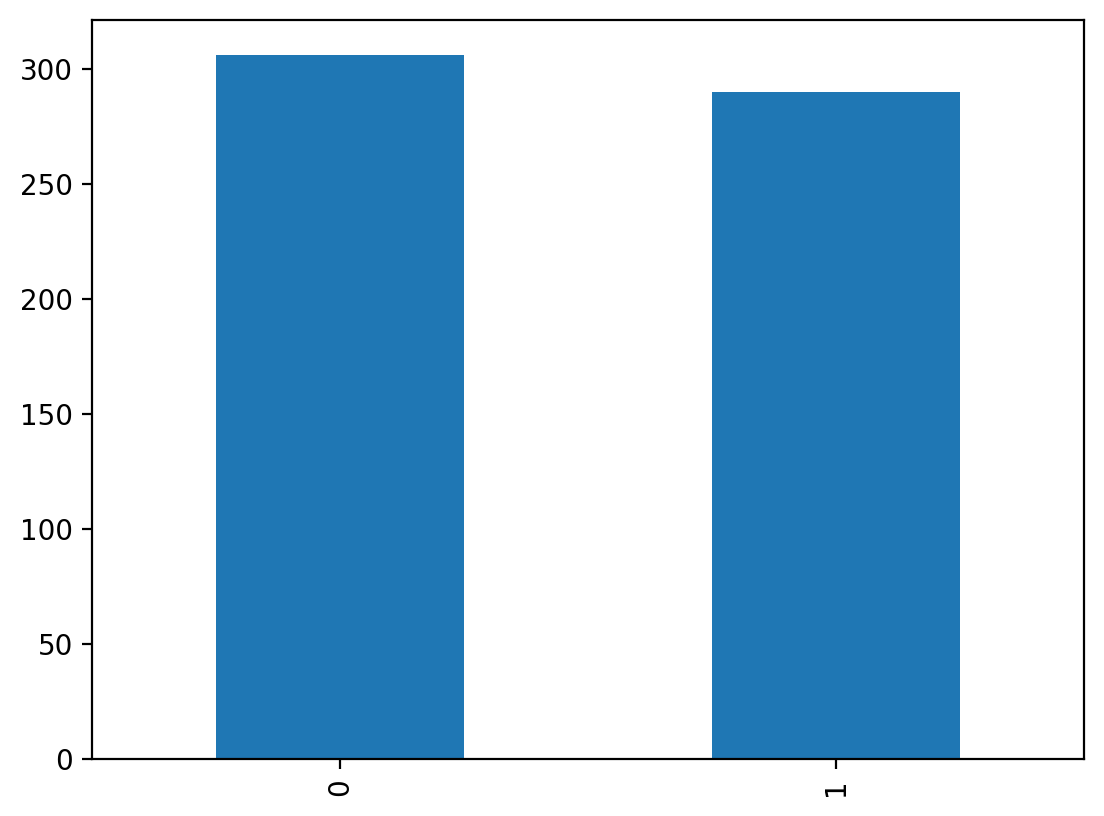

In [507]:
y_val.value_counts().plot(kind='bar')

> NOTE:

When asked to provide the performance metrics you can use the confusion matrix or the methods in `sklearn.metrics`.  
**Performance metrics** (at the very least):  
- Recall (Sensitivity)  
- Specificity  
- Precision  
- Balanced Accuracy  
- F1 Score  

Grid Search:
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


# Q4

## Decision Tree Model

Let's start by training a single decision tree first!

1. Default decision tree:
    - Initiate the Decision Tree classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.


2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Try several values for the `min_samples_split` hyper-parameter and apply cross validation (`GridSearchCV`) to find the best value.  
        - Using the best model provide the performance metrics for the validation set.
    - Try several values for the `max_depth` hyper-parameter and apply cross validation (`GridSearchCV`) to find the best value. 
        - Using the best model provide the performance metrics for the validation set.
    - Perform grid search (`GridSearchCV`) where you check for `min_samples_split` and `max_depth`.
        - Using the best model provide the performance metrics for the validation set.
        
        
3. Create a chart showing the feature importances based on the best model obtained.

In [662]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [663]:
dt = DecisionTreeClassifier()

In [664]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [665]:
predTrain = dt.predict(X_train)
print(predTrain)

[0 1 0 ... 0 0 0]


In [666]:
predTest = dt.predict(X_test)

In [667]:
predTest

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,

In [668]:
print("Accuracy of training:",metrics.accuracy_score(y_true = y_train, y_pred = predTrain)*100)


Accuracy of training: 100.0


In [669]:
print("Accuracy of testing:",metrics.accuracy_score(y_true = y_test, y_pred = predTest)*100)

Accuracy of testing: 58.62646566164153


In [670]:
matrix=metrics.confusion_matrix(y_test, predTest)
matrix

array([[189, 138],
       [109, 161]])

In [671]:
tn, fp, fn, tp = matrix.ravel()

specificity = tn / (tn + fp)
fpr = fp / (fp + tn)

print("Specificity:", specificity)
print("False Positive Rate:", fpr)

Specificity: 0.5779816513761468
False Positive Rate: 0.42201834862385323


In [672]:
print(metrics.classification_report(y_test, predTest))

              precision    recall  f1-score   support

           0       0.63      0.58      0.60       327
           1       0.54      0.60      0.57       270

    accuracy                           0.59       597
   macro avg       0.59      0.59      0.59       597
weighted avg       0.59      0.59      0.59       597



#  2

In [673]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Using the min_samples_split hyper-parameter and cross validation (GridSearchCV)

In [674]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
cv

StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

In [675]:
params = dict(
    min_samples_split = [5, 10, 20, 30, 40, 50],
    
)

params

{'min_samples_split': [5, 10, 20, 30, 40, 50]}

In [676]:
gs = GridSearchCV(estimator=dt, param_grid=params, scoring='f1', cv=cv, n_jobs=-1, )
gs

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'min_samples_split': [5, 10, 20, 30, 40, 50]},
             scoring='f1')

In [677]:
gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'min_samples_split': [5, 10, 20, 30, 40, 50]},
             scoring='f1')

In [678]:
gs.best_estimator_

DecisionTreeClassifier(min_samples_split=40)

In [679]:
gs.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 40,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [680]:
gs.best_params_

{'min_samples_split': 40}

In [681]:
best_estimator = gs.best_estimator_

In [682]:
best_estimator.get_depth()

18

In [683]:
pred = best_estimator.predict(X_test)
pred

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,

In [684]:
metrics.accuracy_score(y_test, pred)

0.5829145728643216

In [685]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.62      0.61      0.61       327
           1       0.54      0.56      0.55       270

    accuracy                           0.58       597
   macro avg       0.58      0.58      0.58       597
weighted avg       0.58      0.58      0.58       597



In [686]:
matrix0=metrics.confusion_matrix(y_test, pred)
matrix0

array([[198, 129],
       [120, 150]])

In [687]:
tn, fp, fn, tp = matrix0.ravel()

specificity = tn / (tn + fp)
fpr = fp / (fp + tn)

print("Specificity:", specificity)
print("False Positive Rate:", fpr)

Specificity: 0.6055045871559633
False Positive Rate: 0.3944954128440367


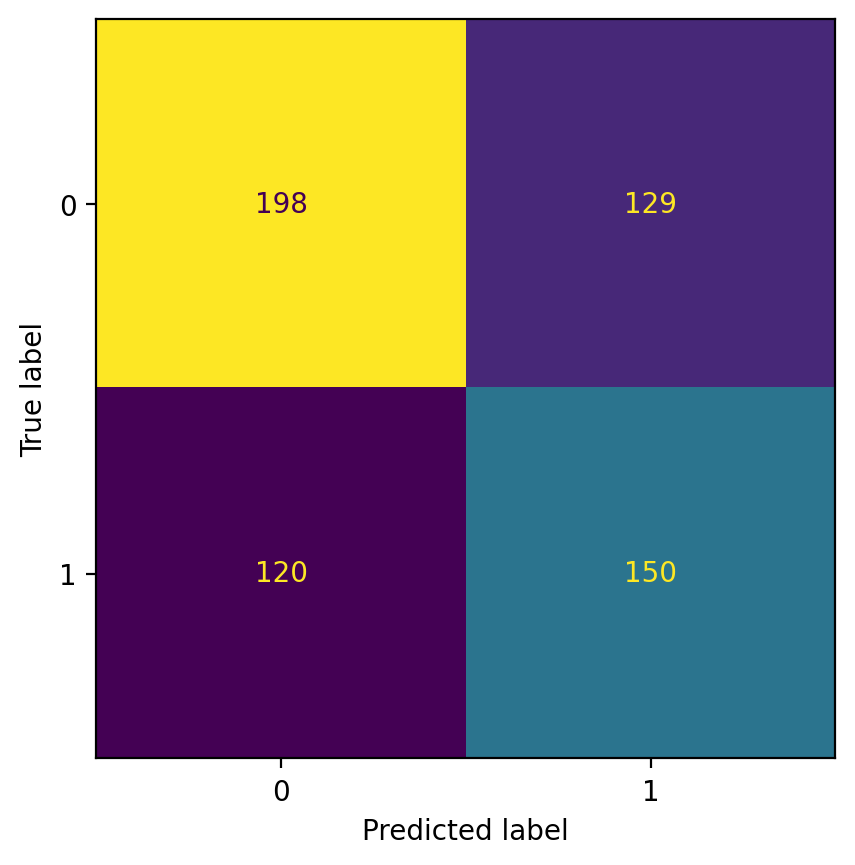

In [688]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred, colorbar=False);

# Using the max_depth hyper-parameter and applying cross validation (GridSearchCV) 

In [689]:
params1 = dict(
    max_depth = [1,2,3,4,5],
)

params1

{'max_depth': [1, 2, 3, 4, 5]}

In [690]:
gs = GridSearchCV(estimator=dt, param_grid=params1, scoring='f1', cv=cv, n_jobs=-1, )
gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5]}, scoring='f1')

In [691]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=1)

In [692]:
gs.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [693]:
gs.best_params_

{'max_depth': 1}

In [694]:
pred = best_estimator.predict(X_test)
metrics.accuracy_score(y_test, pred)

0.5829145728643216

In [695]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.62      0.61      0.61       327
           1       0.54      0.56      0.55       270

    accuracy                           0.58       597
   macro avg       0.58      0.58      0.58       597
weighted avg       0.58      0.58      0.58       597



In [696]:
matrix_=metrics.confusion_matrix(y_test, pred)
matrix_

array([[198, 129],
       [120, 150]])

In [697]:
tn, fp, fn, tp = matrix_.ravel()
specificity = tn / (tn + fp)
fpr = fp / (fp + tn)
print("Specificity:", specificity)
print("False Positive Rate:", fpr)

Specificity: 0.6055045871559633
False Positive Rate: 0.3944954128440367


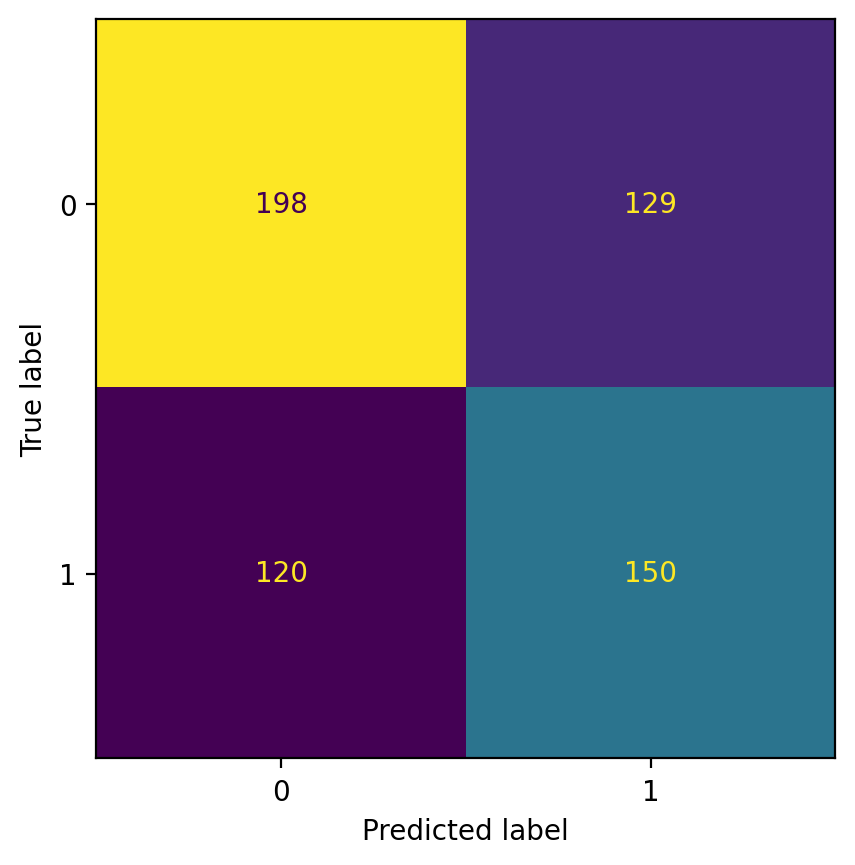

In [698]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred, colorbar=False);

# Using min_samples_split and max_depth

In [699]:
par = dict(
    min_samples_split = [5, 10, 20, 30, 40, 50],
    max_depth = [1,2,3,4,5],
)

par

{'min_samples_split': [5, 10, 20, 30, 40, 50], 'max_depth': [1, 2, 3, 4, 5]}

In [700]:
gs = GridSearchCV(estimator=dt, param_grid=par, scoring='f1', cv=cv, n_jobs=-1, )
gs.fit(X_train, y_train)
print(gs.best_estimator_)

DecisionTreeClassifier(max_depth=1, min_samples_split=5)


In [701]:
gs.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [702]:
gs.best_params_

{'max_depth': 1, 'min_samples_split': 5}

In [703]:
best_estimator = gs.best_estimator_

In [704]:
pred = best_estimator.predict(X_test)
metrics.accuracy_score(y_test, pred)

0.5326633165829145

In [705]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.74      0.23      0.35       327
           1       0.49      0.90      0.64       270

    accuracy                           0.53       597
   macro avg       0.61      0.56      0.49       597
weighted avg       0.62      0.53      0.48       597



In [706]:
matrix1=metrics.confusion_matrix(y_test, pred)
matrix1

array([[ 75, 252],
       [ 27, 243]])

In [707]:
tn, fp, fn, tp = matrix1.ravel()

specificity = tn / (tn + fp)
fpr = fp / (fp + tn)

print("Specificity:", specificity)
print("False Positive Rate:", fpr)

Specificity: 0.22935779816513763
False Positive Rate: 0.7706422018348624


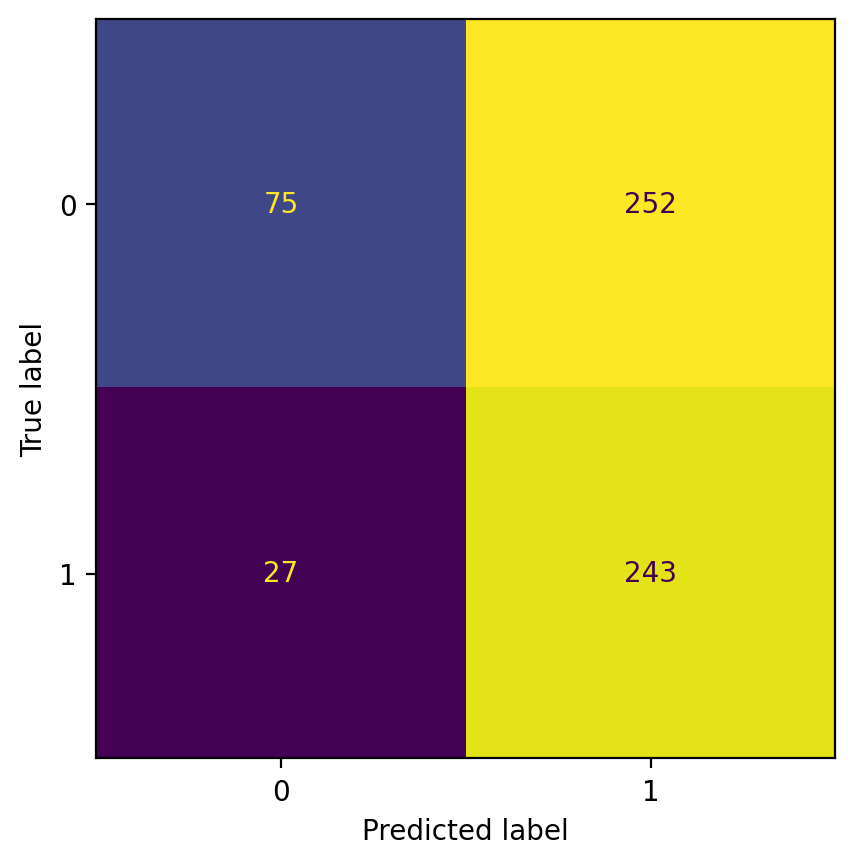

In [708]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred, colorbar=False);

# 3  feature importances

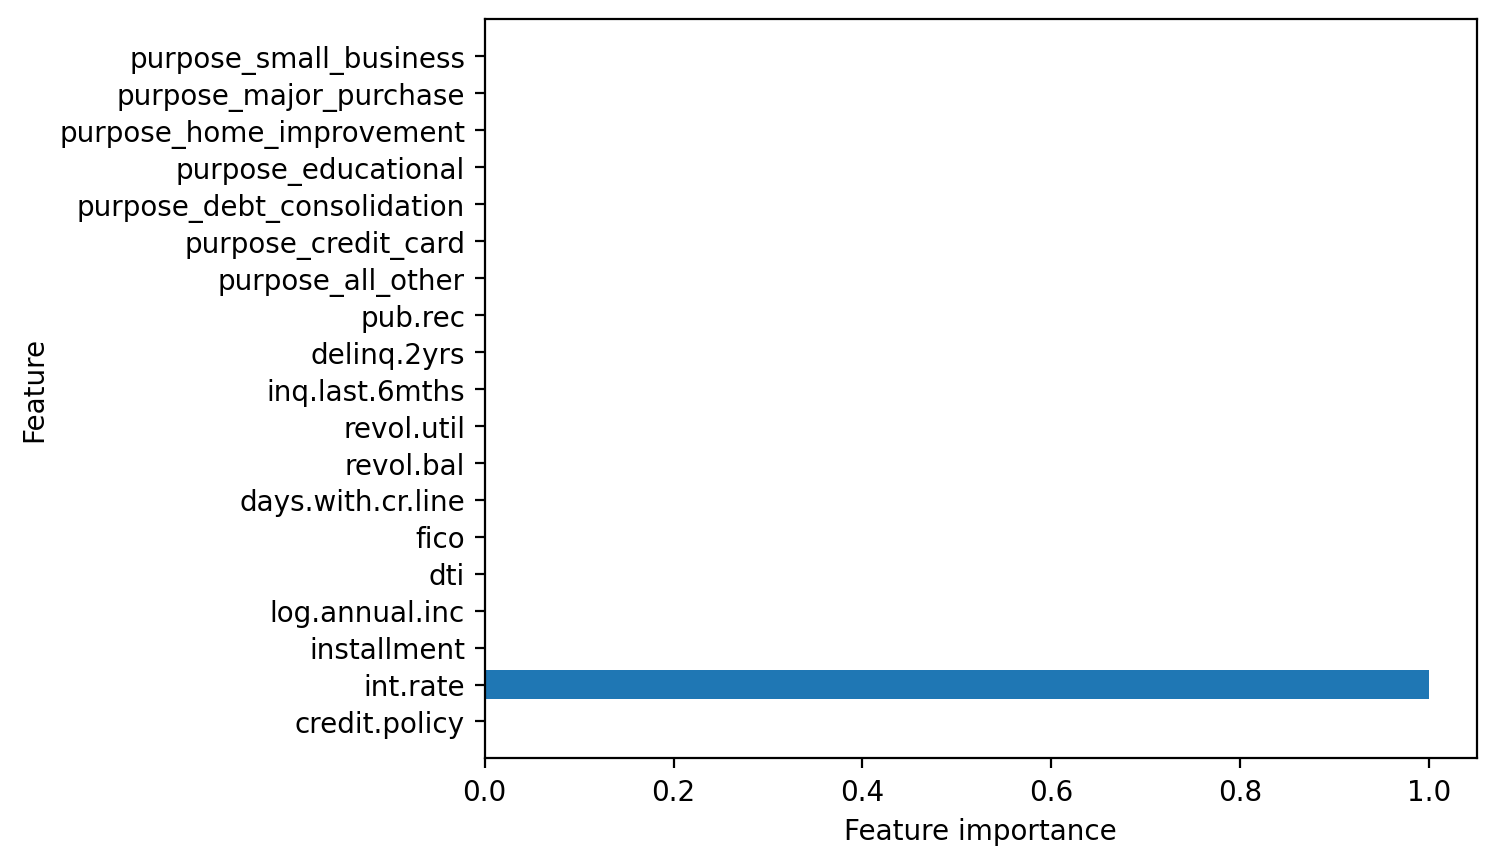

In [709]:
def plot_feature_importances(model, df):
    n_features = df.shape[1]
    df_colnames= df.columns
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df_colnames)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(best_estimator, df=X)

# Q5

## Random Forest model

1. Default Random Forest Classifier:
    - Initiate the Random Forest Classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.
    
    
2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Perform grid search (`GridSearchCV`) where you check for `min_samples_split`, `max_depth`, and `n_estimators`.
        - Using the best model provide the performance metrics for the validation set.
       
3. Create a chart showing the feature importances based on the best model obtained.

In [710]:
from sklearn.ensemble import RandomForestClassifier

In [711]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
pred_test=clf.predict(X_test)


In [712]:
pred_train = clf.predict(X_train)

In [713]:
print("Accuracy of training :",metrics.accuracy_score(y_train, pred_train))

Accuracy of training : 1.0


In [714]:
print("Accuracy of testing:",metrics.accuracy_score(y_test, pred_test))

Accuracy of testing: 0.6113902847571189


In [715]:
matrix3=metrics.confusion_matrix(y_test, pred_test)

In [716]:
tn, fp, fn, tp = matrix3.ravel()

specificity = tn / (tn + fp)
fpr = fp / (fp + tn)

print("Specificity:", specificity)
print("False Positive Rate:", fpr)

Specificity: 0.636085626911315
False Positive Rate: 0.363914373088685


In [717]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.65      0.64      0.64       327
           1       0.57      0.58      0.58       270

    accuracy                           0.61       597
   macro avg       0.61      0.61      0.61       597
weighted avg       0.61      0.61      0.61       597



# 2. perform hyper-parameter tuning using min_samples_split, max_depth, and n_estimators

In [718]:
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'min_samples_split':[1,2,3]
           }

In [719]:
gs = GridSearchCV(estimator=clf, param_grid=grid_space, scoring='f1', cv=cv, n_jobs=-1, )
model_grid =gs.fit(X_train, y_train)

In [720]:
model_grid.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [721]:
best_estimator = model_grid.best_estimator_
print(best_estimator)

RandomForestClassifier(min_samples_split=3, n_estimators=200)


In [722]:
model_grid.best_params_

{'max_depth': None, 'min_samples_split': 3, 'n_estimators': 200}

In [723]:
pred = best_estimator.predict(X_test)

In [724]:
metrics.accuracy_score(y_test, pred)

0.6013400335008375

In [725]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.64      0.63      0.63       327
           1       0.56      0.56      0.56       270

    accuracy                           0.60       597
   macro avg       0.60      0.60      0.60       597
weighted avg       0.60      0.60      0.60       597



In [726]:
matrix4=metrics.confusion_matrix(y_test, pred)
matrix4

array([[207, 120],
       [118, 152]])

In [727]:
tn, fp, fn, tp = matrix4.ravel()

specificity = tn / (tn + fp)
fpr = fp / (fp + tn)

print("Specificity:", specificity)
print("False Positive Rate:", fpr)

Specificity: 0.6330275229357798
False Positive Rate: 0.3669724770642202


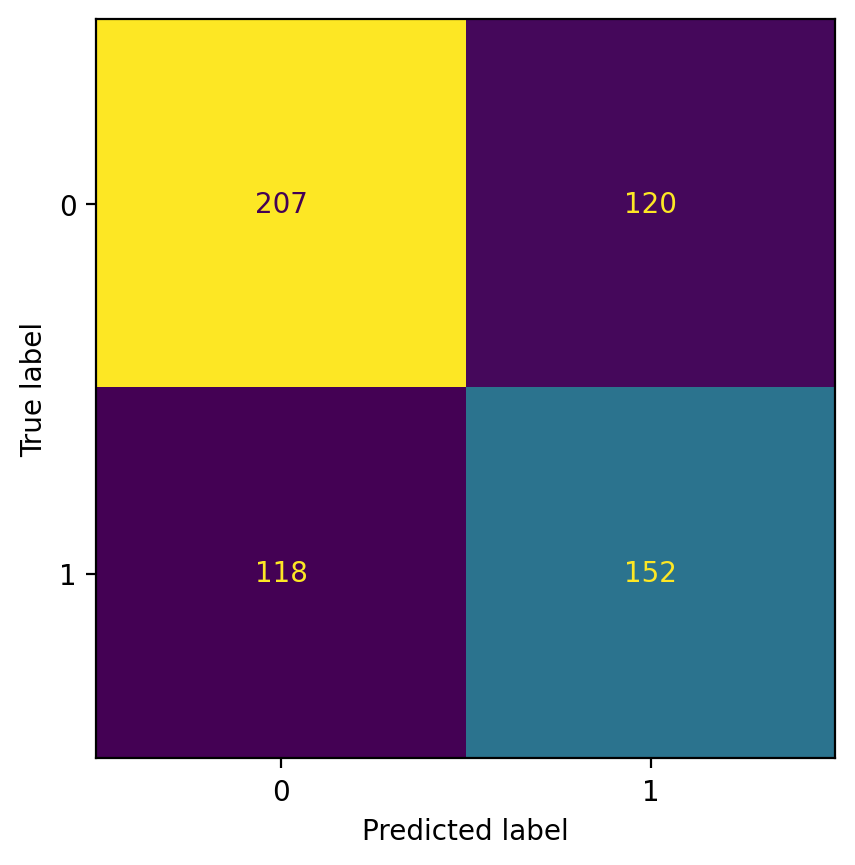

In [728]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred, colorbar=False);

# 3  feature importances

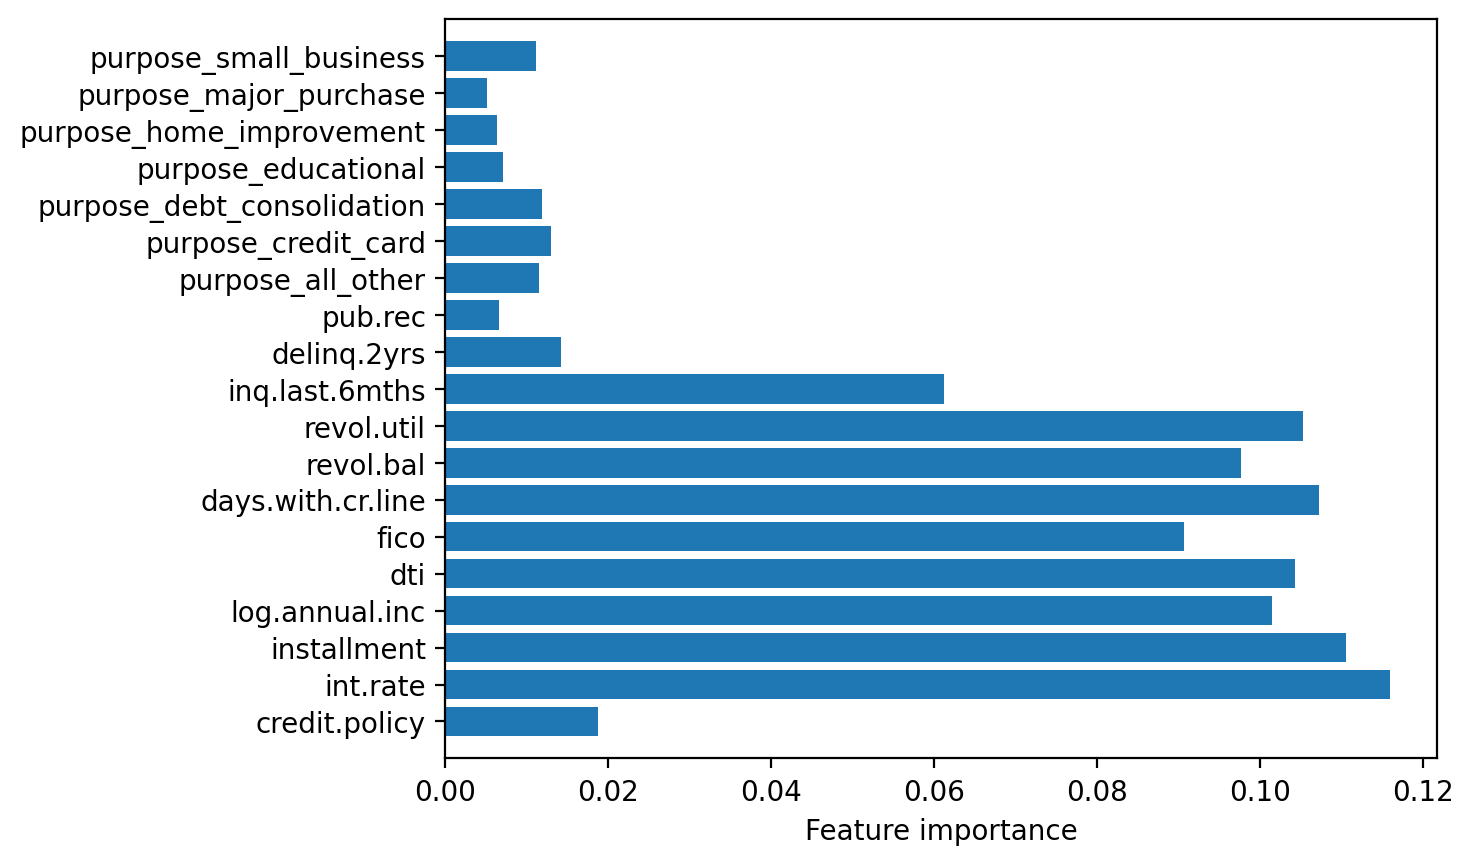

In [729]:
def plot_feature_importances(model, df):
    n_features = df.shape[1]
    df_colnames= df.columns
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df_colnames)
    plt.xlabel("Feature importance")
#     plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(best_estimator, df=X)

# Q6

## Adaboost model

1. Default Adaboost classifier:
    - Initiate the Adaboost classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.
    
    
2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Perform grid search (`GridSearchCV`) where you check for `learning_rate`, and `n_estimators`.
        - Using the best model provide the performance metrics for the validation set.
       
3. Create a chart showing the feature importances based on the best model obtained.

In [730]:
from sklearn.ensemble import AdaBoostClassifier

In [731]:
abc = AdaBoostClassifier()
model = abc.fit(X_train, y_train)

In [732]:
pred_train = abc.predict(X_train)
pred_train

array([0, 1, 0, ..., 0, 0, 0])

In [733]:
pred_test = abc.predict(X_test)
pred_test

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,

In [734]:
print("Accuracy of training :",metrics.accuracy_score(y_train, pred_train))

Accuracy of training : 0.6739373601789709


In [735]:
print("Accuracy of testing:",metrics.accuracy_score(y_test, pred_test))

Accuracy of testing: 0.5979899497487438


In [736]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.64      0.63      0.63       327
           1       0.56      0.56      0.56       270

    accuracy                           0.60       597
   macro avg       0.60      0.60      0.60       597
weighted avg       0.60      0.60      0.60       597



In [737]:
matrix5=metrics.confusion_matrix(y_test, pred)
matrix5

array([[207, 120],
       [118, 152]])

In [738]:
tn, fp, fn, tp = matrix5.ravel()

specificity = tn / (tn + fp)
fpr = fp / (fp + tn)

print("Specificity:", specificity)
print("False Positive Rate:", fpr)

Specificity: 0.6330275229357798
False Positive Rate: 0.3669724770642202


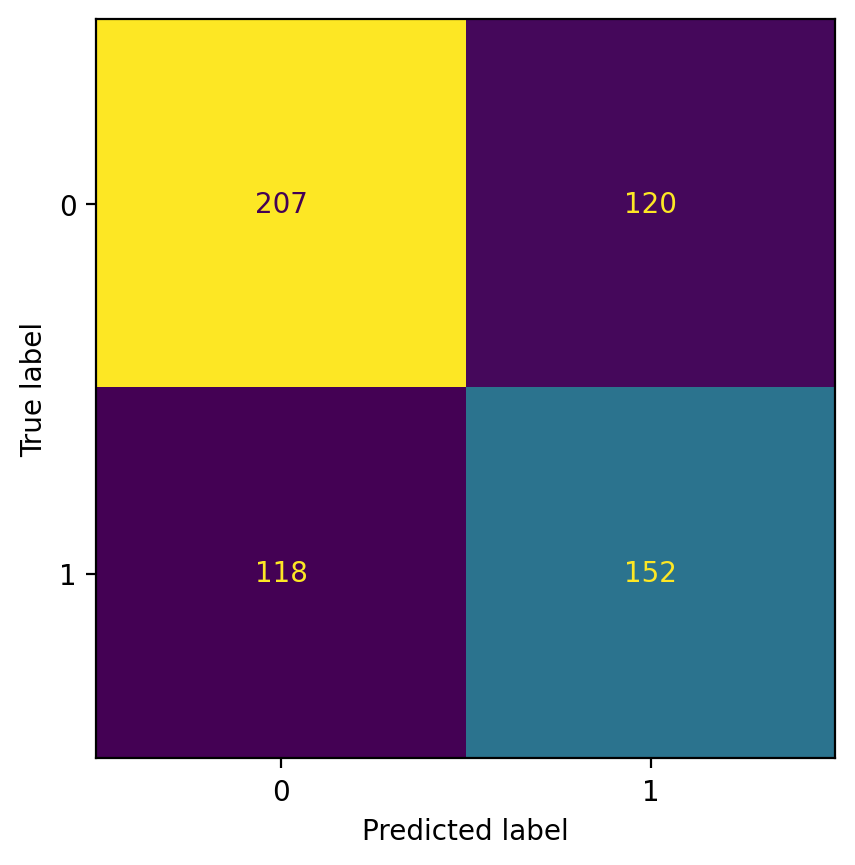

In [739]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred, colorbar=False);

# 2

In [740]:
from sklearn.model_selection import GridSearchCV


In [741]:
grid = dict(
    n_estimators = [10, 50, 100, 500],
    learning_rate = [0.0001, 0.001, 0.01, 0.1, 1.0],
)

In [742]:
gs = GridSearchCV(estimator=abc, param_grid=grid, scoring='f1', cv=cv, n_jobs=-1, )

In [743]:
model_grid1=gs.fit(X_train, y_train)

In [744]:
model_grid1.best_estimator_

AdaBoostClassifier(learning_rate=0.0001, n_estimators=500)

In [745]:
model_grid1.best_estimator_.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 0.0001,
 'n_estimators': 500,
 'random_state': None}

In [746]:
model_grid1.best_params_

{'learning_rate': 0.0001, 'n_estimators': 500}

In [747]:
best_estimator1 = model_grid1.best_estimator_

In [748]:
pred1 = best_estimator1.predict(X_test)

In [749]:
metrics.accuracy_score(y_test, pred1)

0.5326633165829145

In [750]:
print(metrics.classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.74      0.23      0.35       327
           1       0.49      0.90      0.64       270

    accuracy                           0.53       597
   macro avg       0.61      0.56      0.49       597
weighted avg       0.62      0.53      0.48       597



In [751]:
matrix6=metrics.confusion_matrix(y_test, pred1)
matrix6

array([[ 75, 252],
       [ 27, 243]])

In [752]:
tn, fp, fn, tp = matrix6.ravel()

specificity = tn / (tn + fp)
fpr = fp / (fp + tn)

print("Specificity:", specificity)
print("False Positive Rate:", fpr)

Specificity: 0.22935779816513763
False Positive Rate: 0.7706422018348624


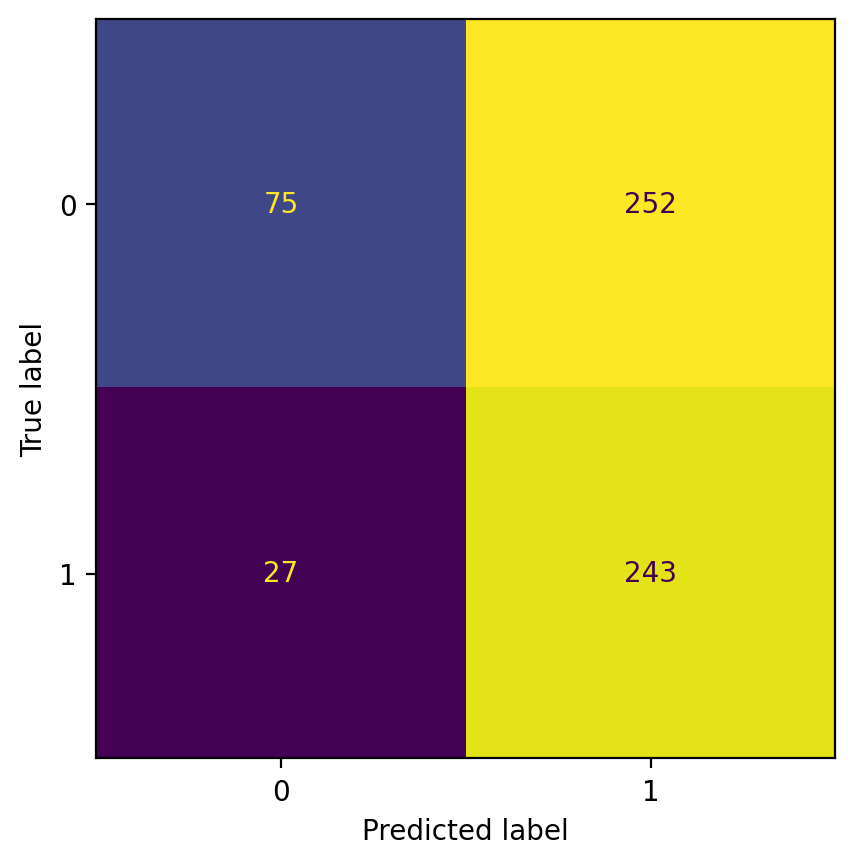

In [753]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred1, colorbar=False);

# 3 Feature Importance

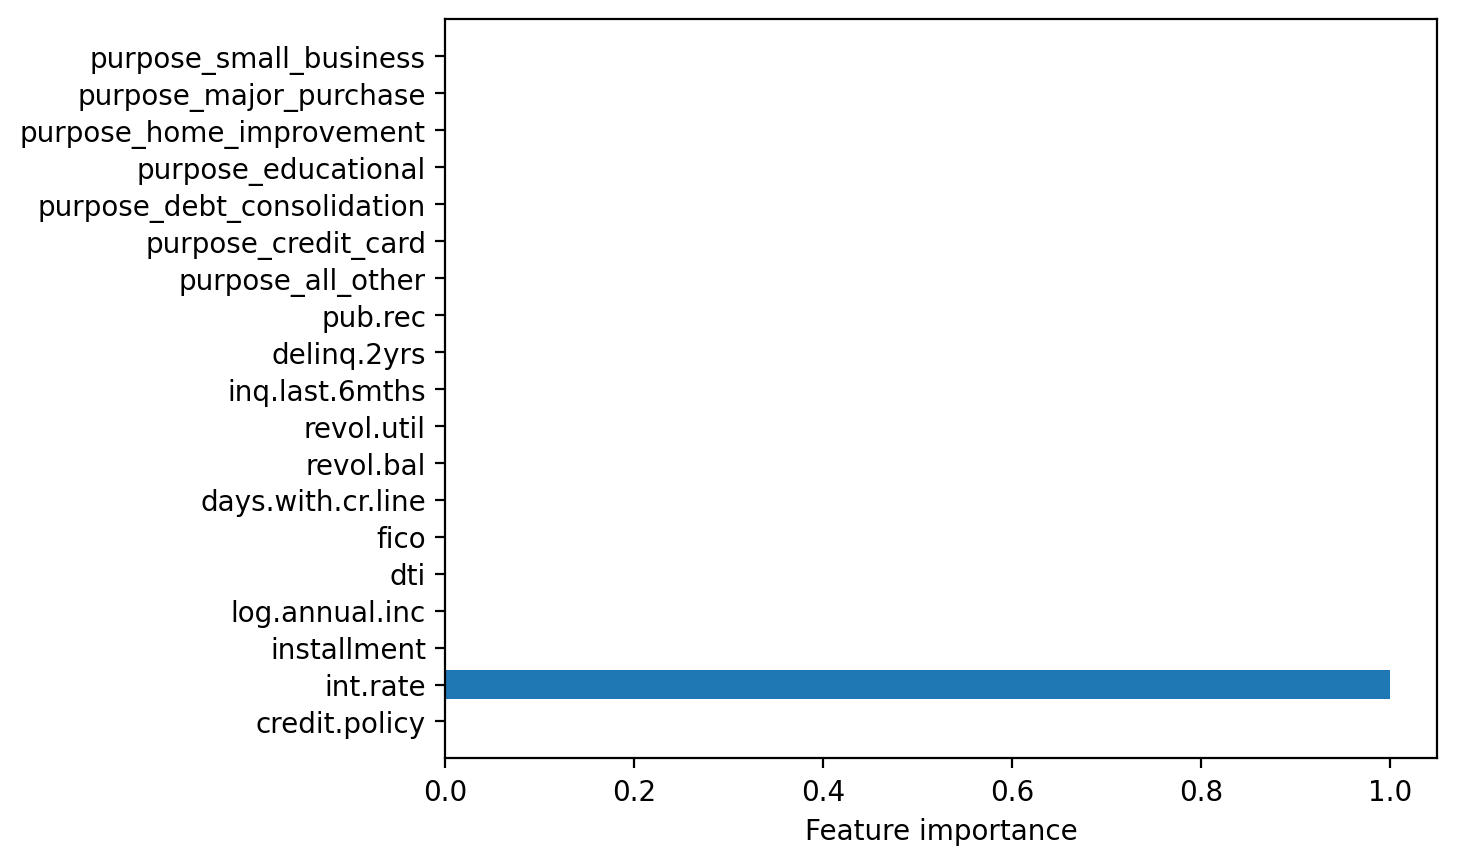

In [754]:
def plot_feature_importances(model, df):
    n_features = df.shape[1]
    df_colnames= df.columns
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df_colnames)
    plt.xlabel("Feature importance")
#     plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(best_estimator1, df=X)

# Q7

## Gradient Boosting Machine

1. Default Gradient Boosting classifier:
    - Initiate the Gradient Boosting classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.
    
    
2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Perform grid search (`GridSearchCV`) where you check for `learning_rate`, and `n_estimators`.
        - Using the best model provide the performance metrics for the validation set.
        
3. Create a chart showing the feature importances based on the best model obtained.

In [755]:
from sklearn.ensemble import GradientBoostingClassifier

In [756]:
gradient_booster = GradientBoostingClassifier()
gradient_booster.fit(X_train,y_train)

GradientBoostingClassifier()

In [757]:
pred_train = gradient_booster.predict(X_train)
pred_train

array([0, 1, 0, ..., 1, 0, 0])

In [758]:
pred_test = gradient_booster.predict(X_test)
pred_test

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [759]:
print("Accuracy of training :",metrics.accuracy_score(y_train, pred_train))

Accuracy of training : 0.7986577181208053


In [760]:
print("Accuracy of testing:",metrics.accuracy_score(y_test, pred_test))

Accuracy of testing: 0.6063651591289783


In [761]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.64      0.63      0.63       327
           1       0.56      0.56      0.56       270

    accuracy                           0.60       597
   macro avg       0.60      0.60      0.60       597
weighted avg       0.60      0.60      0.60       597



In [762]:
matrix7=metrics.confusion_matrix(y_test, pred)
matrix7

array([[207, 120],
       [118, 152]])

In [763]:
tn, fp, fn, tp = matrix7.ravel()

specificity = tn / (tn + fp)
fpr = fp / (fp + tn)

print("Specificity:", specificity)
print("False Positive Rate:", fpr)

Specificity: 0.6330275229357798
False Positive Rate: 0.3669724770642202


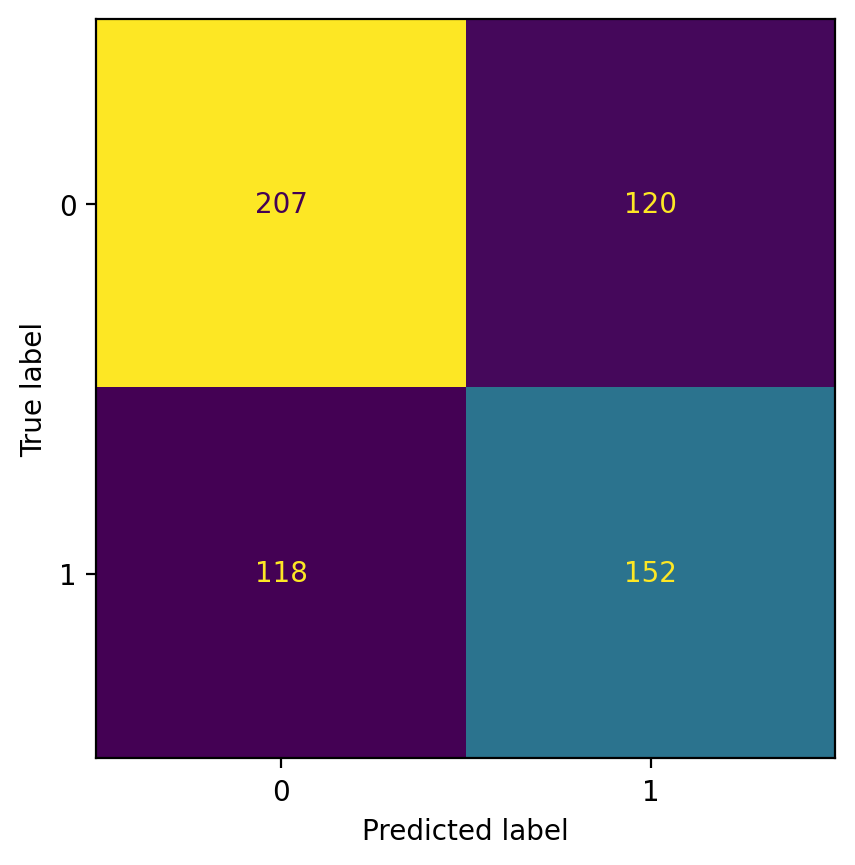

In [764]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred, colorbar=False);

# 2 Performing the grid search (GridSearchCV) using learning_rate, and n_estimators

In [765]:
grid1 = dict(
    n_estimators = [10, 50, 100, 500],
    learning_rate = [0.0001, 0.001, 0.01, 0.1, 1.0],
)

In [766]:
gs = GridSearchCV(estimator=gradient_booster, param_grid=grid1, scoring='f1', cv=cv, n_jobs=-1, )
model_grid1=gs.fit(X_train, y_train)

In [767]:
gs.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, n_estimators=500)

In [768]:
gs.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [769]:
gs.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [770]:
best_estimator = gs.best_estimator_

In [771]:
pred = best_estimator.predict(X_test)

In [772]:
metrics.accuracy_score(y_test, pred)

0.6046901172529313

In [773]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64       327
           1       0.56      0.56      0.56       270

    accuracy                           0.60       597
   macro avg       0.60      0.60      0.60       597
weighted avg       0.60      0.60      0.60       597



In [774]:
matrix8=metrics.confusion_matrix(y_test, pred)
matrix8

array([[210, 117],
       [119, 151]])

In [775]:
tn, fp, fn, tp = matrix8.ravel()

specificity = tn / (tn + fp)
fpr = fp / (fp + tn)

print("Specificity:", specificity)
print("False Positive Rate:", fpr)

Specificity: 0.6422018348623854
False Positive Rate: 0.3577981651376147


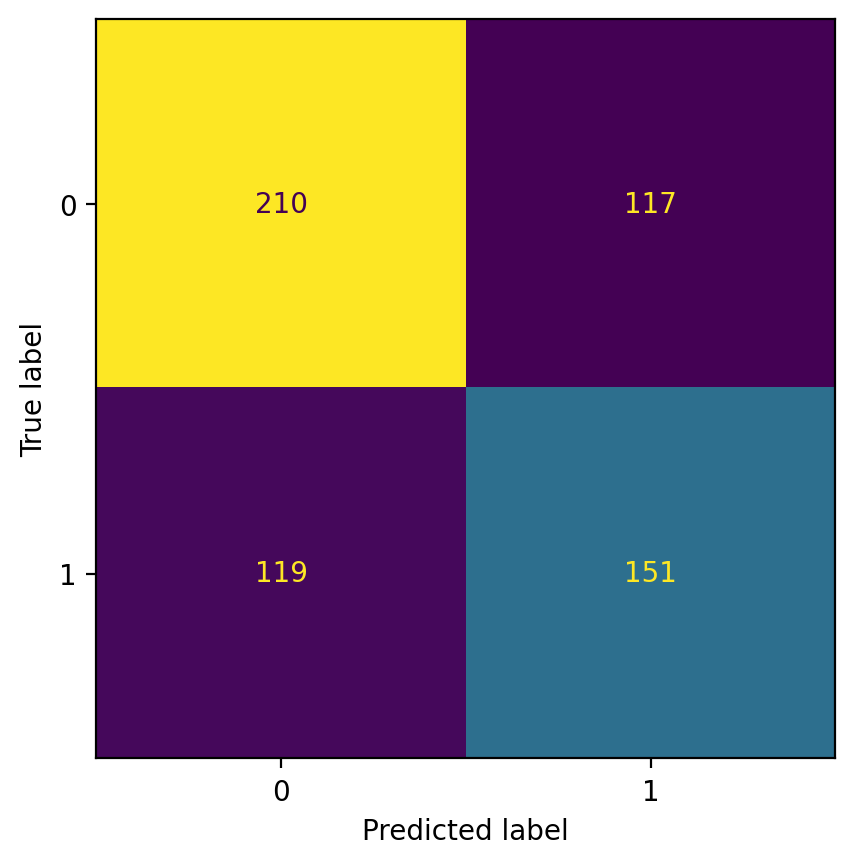

In [776]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred, colorbar=False);

# 3. Feature Importance

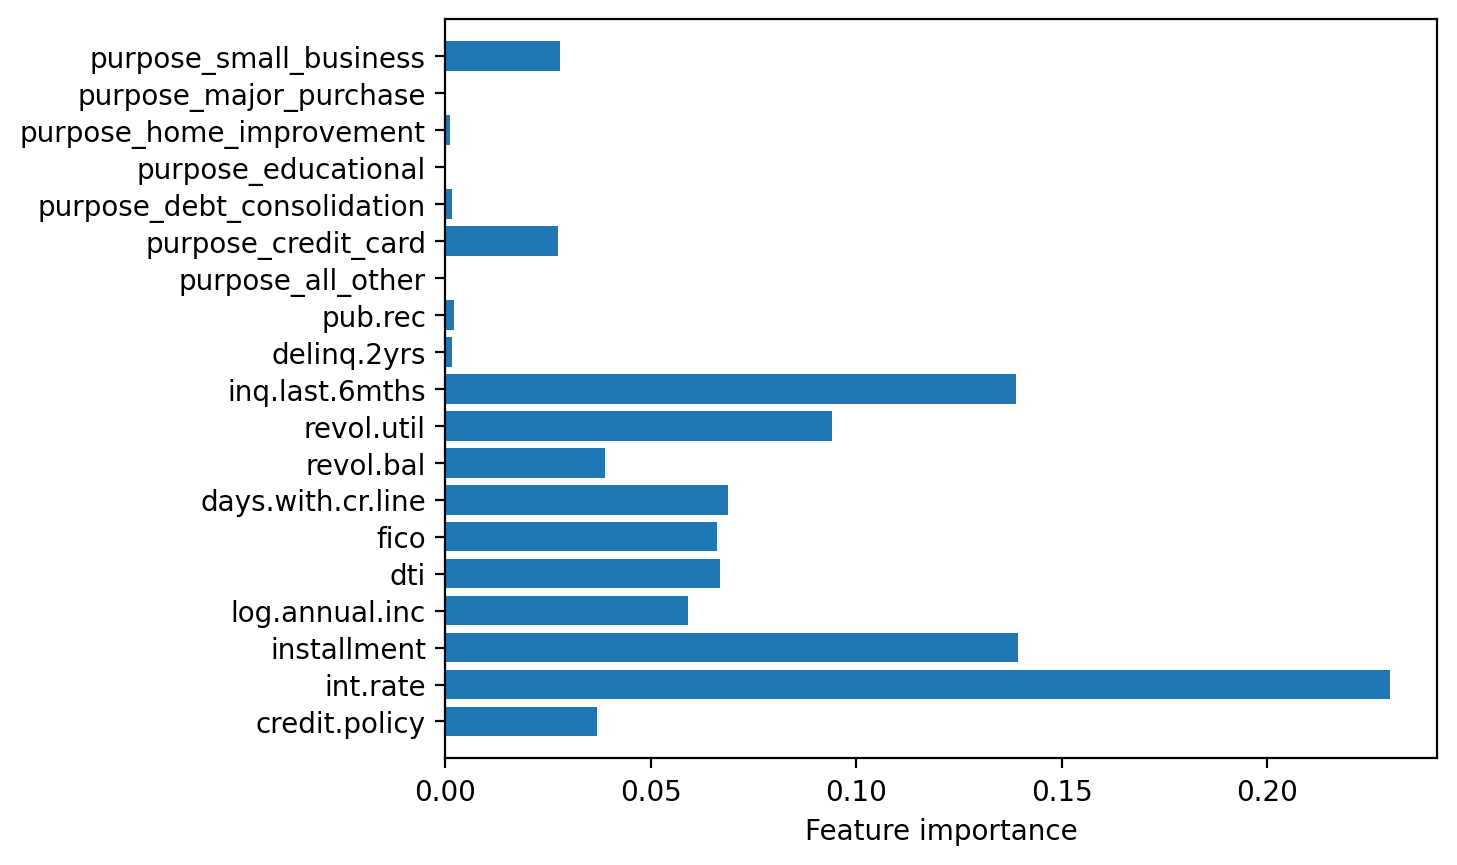

In [777]:
def plot_feature_importances(model, df):
    n_features = df.shape[1]
    df_colnames= df.columns
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df_colnames)
    plt.xlabel("Feature importance")
#     plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(best_estimator, df=X)

# Q8 (15 points)

- Using one or more of the Decision Tree, Random Forest, Adaboost, and Gradient Boosting classifer models:
    - Think of other ways of improving the recall and F1-score and list at least two possibilities.
    - Implement both of the methods you proposed. 
    - Is the model F1-score increasing?

I used decision tree model and used gini, entropy, max depth to improve the recall and F1 score.

In [778]:
from sklearn.metrics import accuracy_score
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
print('Criterion=gini', accuracy_score(y_test, pred))
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
print('Criterion=entropy', accuracy_score(y_test, pred))

Criterion=gini 0.5795644891122278
Criterion=entropy 0.5477386934673367


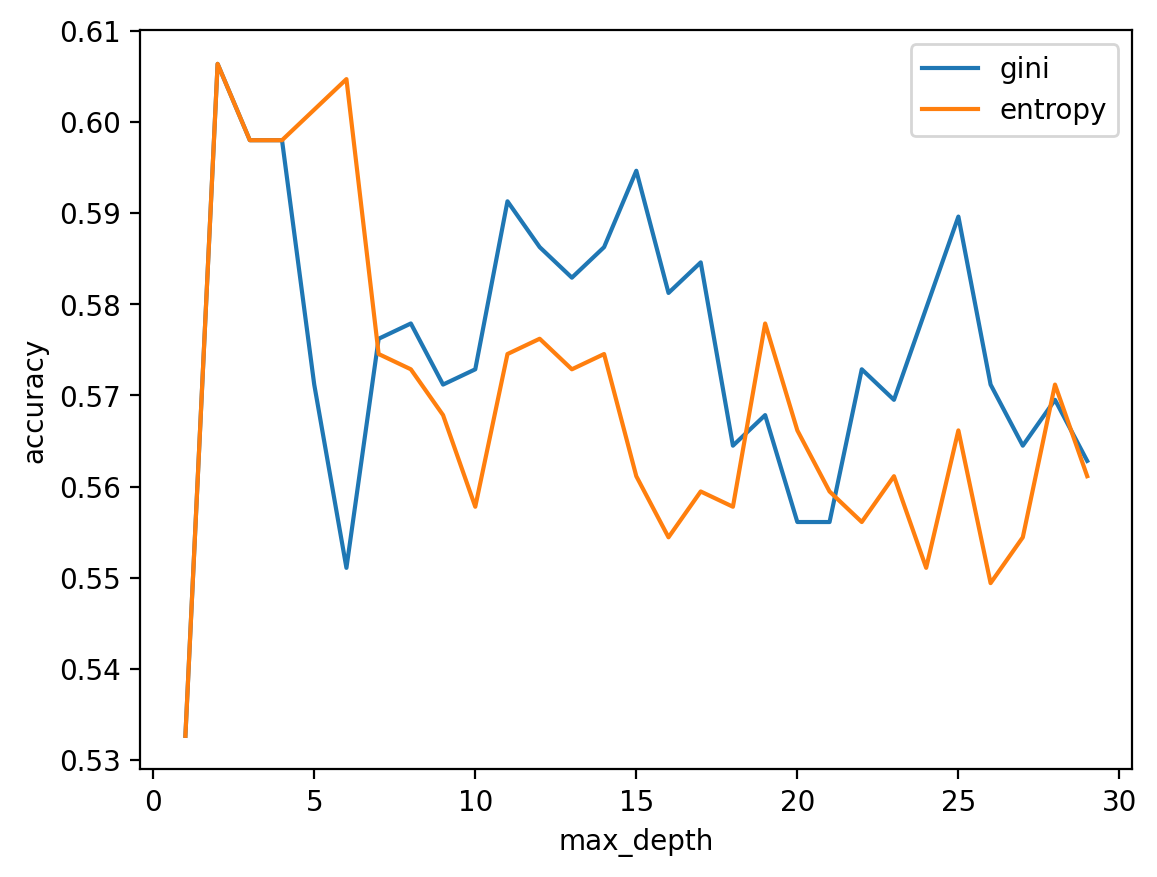

In [779]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
    dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc_gini.append(accuracy_score(y_test, pred))
 ####
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc_entropy.append(accuracy_score(y_test, pred))
 ####
    max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

It seems like in this scenario entropy works best  (as we saw in the previous accuracies),So let’s draw the tree with max_depth=5 and criterion=entropy.

In [780]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
accuracy_score(y_test, pred)

0.6063651591289783

In [781]:
matrix9=metrics.confusion_matrix(y_test, pred)
matrix9

array([[267,  60],
       [175,  95]])

In [782]:
tn, fp, fn, tp = matrix9.ravel()

specificity = tn / (tn + fp)
fpr = fp / (fp + tn)
print("Specificity:", specificity)
print("False Positive Rate:", fpr)

Specificity: 0.8165137614678899
False Positive Rate: 0.1834862385321101


In [783]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.60      0.82      0.69       327
           1       0.61      0.35      0.45       270

    accuracy                           0.61       597
   macro avg       0.61      0.58      0.57       597
weighted avg       0.61      0.61      0.58       597



Yes, both the f1 score and the recall value increase, as does model accuracy.

# Q9 (15 points)

- Choose the best fitted model for each of the classifiers (1 model for each of Decision Tree, Random Forest, Adaboost, and Gradient Boosting)
- Create a table summarizing results on the **test set**:
    - Create confusion matrix for each model
    - Provide the performance metrics on the test set for each model.

Which one is the winner among all?

# 1. Decision tree

In [784]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=1,min_samples_split=5)
clf = clf.fit(X_train,y_train)

In [785]:
y_pred = clf.predict(X_test)

In [786]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5326633165829145


In [787]:
matrix10=metrics.confusion_matrix(y_test, y_pred)
matrix10

array([[ 75, 252],
       [ 27, 243]])

In [788]:
tn, fp, fn, tp = matrix10.ravel()

specificity = tn / (tn + fp)
fpr = fp / (fp + tn)
print("Specificity:", specificity)
print("False Positive Rate:", fpr)

Specificity: 0.22935779816513763
False Positive Rate: 0.7706422018348624


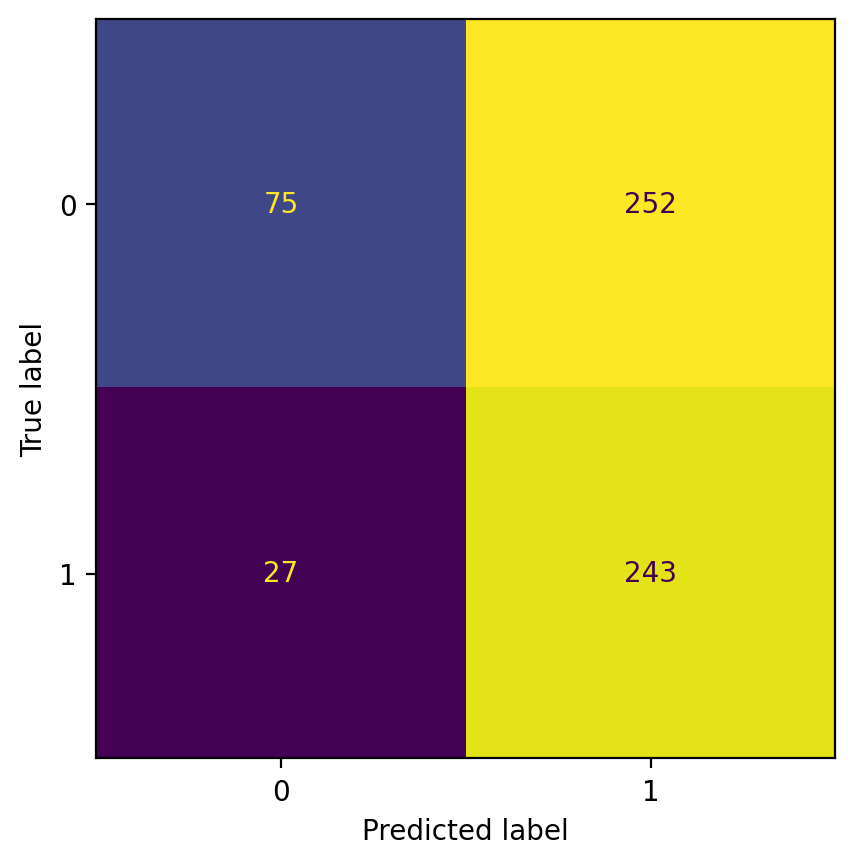

In [789]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False);

In [790]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.23      0.35       327
           1       0.49      0.90      0.64       270

    accuracy                           0.53       597
   macro avg       0.61      0.56      0.49       597
weighted avg       0.62      0.53      0.48       597



# Random forest

In [791]:
clf=RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=3)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [792]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6197654941373534


In [793]:
matrix11=metrics.confusion_matrix(y_test, y_pred)
matrix11

array([[209, 118],
       [109, 161]])

In [794]:
tn, fp, fn, tp = matrix11.ravel()

specificity = tn / (tn + fp)
fpr = fp / (fp + tn)
print("Specificity:", specificity)
print("False Positive Rate:", fpr)

Specificity: 0.6391437308868502
False Positive Rate: 0.36085626911314983


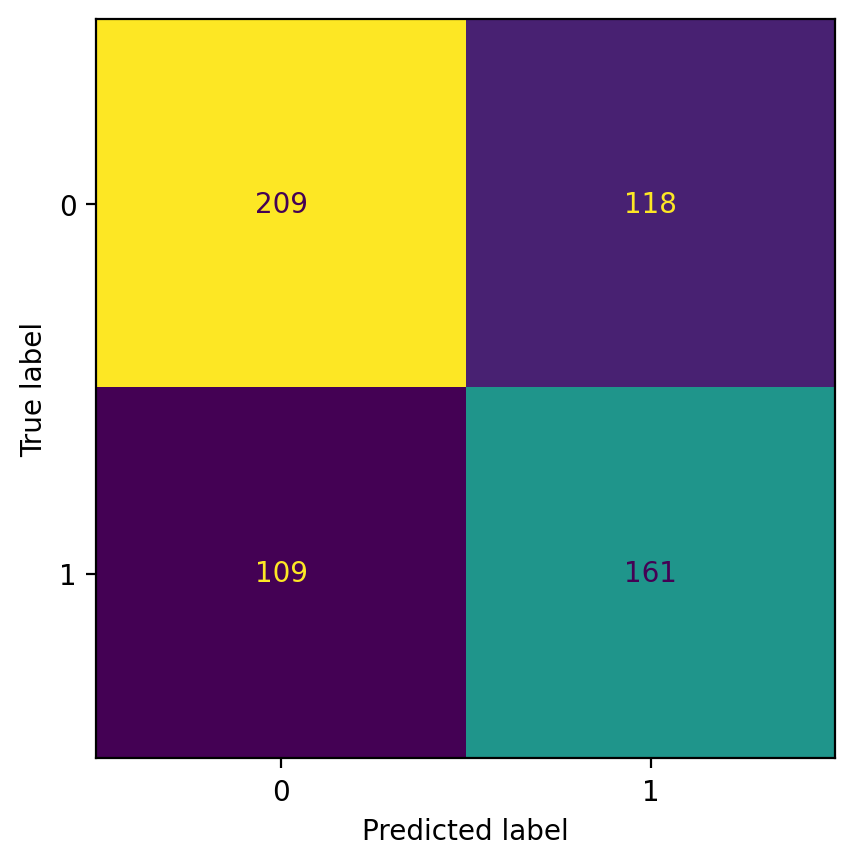

In [795]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False);

In [796]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.64      0.65       327
           1       0.58      0.60      0.59       270

    accuracy                           0.62       597
   macro avg       0.62      0.62      0.62       597
weighted avg       0.62      0.62      0.62       597



#  Adaboost

In [797]:
# Create adaboost classifer object
m1 = AdaBoostClassifier(n_estimators=500,
                         learning_rate=0.0001)
# Train Adaboost Classifer
model = m1.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [798]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5326633165829145


In [799]:
matrix12=metrics.confusion_matrix(y_test, y_pred)
matrix12

array([[ 75, 252],
       [ 27, 243]])

In [800]:
tn, fp, fn, tp = matrix12.ravel()

specificity = tn / (tn + fp)
fpr = fp / (fp + tn)
print("Specificity:", specificity)
print("False Positive Rate:", fpr)

Specificity: 0.22935779816513763
False Positive Rate: 0.7706422018348624


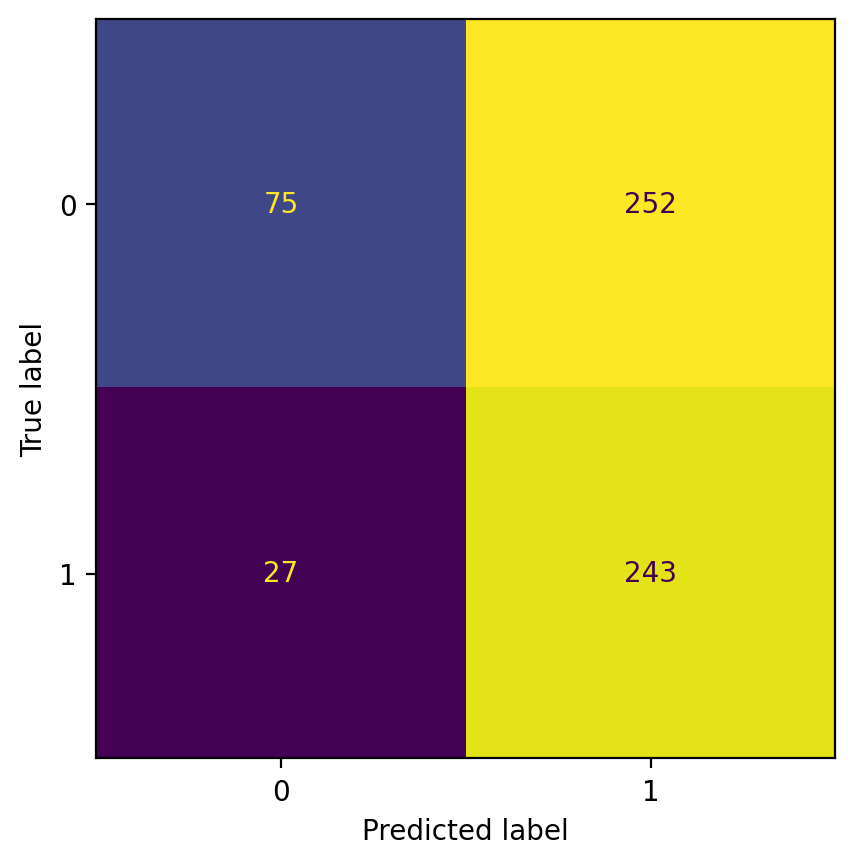

In [801]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False);

In [802]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.23      0.35       327
           1       0.49      0.90      0.64       270

    accuracy                           0.53       597
   macro avg       0.61      0.56      0.49       597
weighted avg       0.62      0.53      0.48       597



# Gradient boosting machine

In [803]:
m2 = GradientBoostingClassifier(learning_rate=0.01,n_estimators=500)
model = m2.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [804]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6046901172529313


In [805]:
matrix13=metrics.confusion_matrix(y_test, y_pred)
matrix13

array([[210, 117],
       [119, 151]])

In [806]:
tn, fp, fn, tp = matrix13.ravel()

specificity = tn / (tn + fp)
fpr = fp / (fp + tn)
print("Specificity:", specificity)
print("False Positive Rate:", fpr)

Specificity: 0.6422018348623854
False Positive Rate: 0.3577981651376147


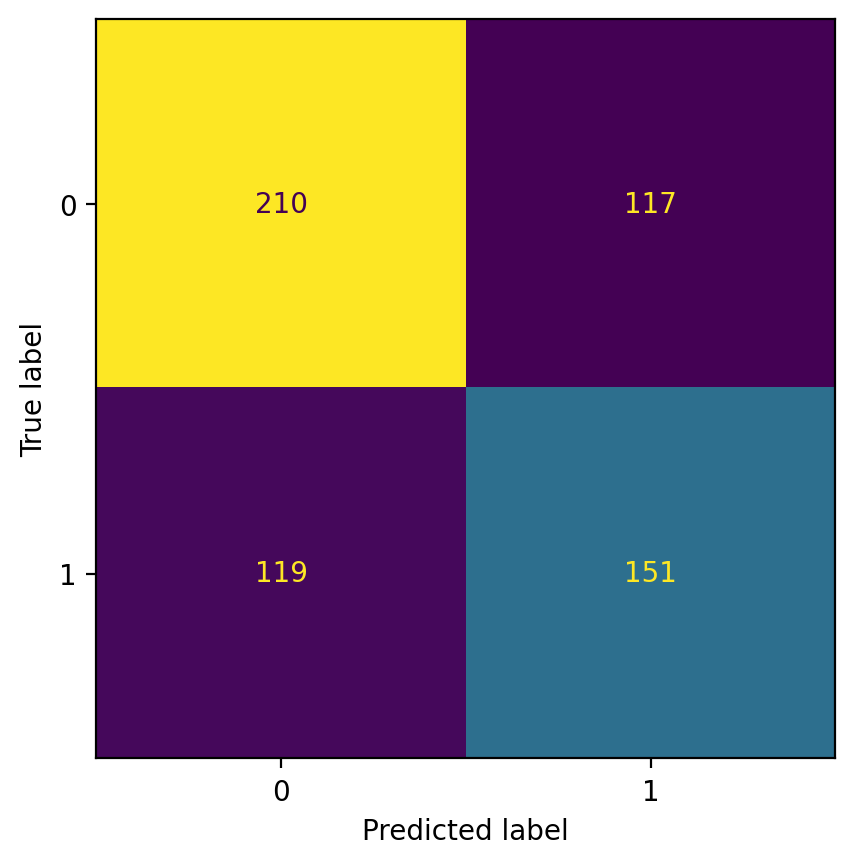

In [807]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False);

In [808]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64       327
           1       0.56      0.56      0.56       270

    accuracy                           0.60       597
   macro avg       0.60      0.60      0.60       597
weighted avg       0.60      0.60      0.60       597



Which one is the winner among all?

Random forest performed better, with an accuracy of 61%, a weighted average F1-score of 61%, and a precision of 61%.

# Great Job!